# Capstone Project:  Credit Card Fraud Detection 

### Problem Statement
**To predict fraudulent credit card transactions with the help of machine learning models**

## Business problem overview

- For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.
- It has been estimated by Nilson Report that by 2020, banking frauds would account for 30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 
- In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

## Understanding and defining fraud

Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, the other ways are as follows:
- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stealing/loss of credit cards
- Fraudulent telemarketing

## Credit Card Fraud Capstone Project

In this project we will predict fraudulent credit card transactions with the help of ML models. 

In order to complete the project, we are going to follow below high level steps to build and select best model.
- perform exploratory data analysis on the dataset 
- Build different classification models on the unbalanced data
- Building different models on 3 different balancing technique.
    - Random Oversampling
    - SMOTE
    - ADASYN

## Importing libraries

In [1]:
# Supress Warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

#Import the relevant libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Reading and Understanding Data

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Shape of dataset

In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

Here we will observe the distribution of our classe

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [6]:
print(normal_share,fraud_share)

99.82725143693798 0.1727485630620034


In [7]:
def pie_plot(column_name):
    df[column_name].value_counts().plot.pie(autopct = "%1.3f%%",colors = sns.color_palette("Set2",7),
                            startangle = 60,labels=["No","Yes"],
                            wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
    plt.title("Distribution of "+column_name+" " , size = 12)

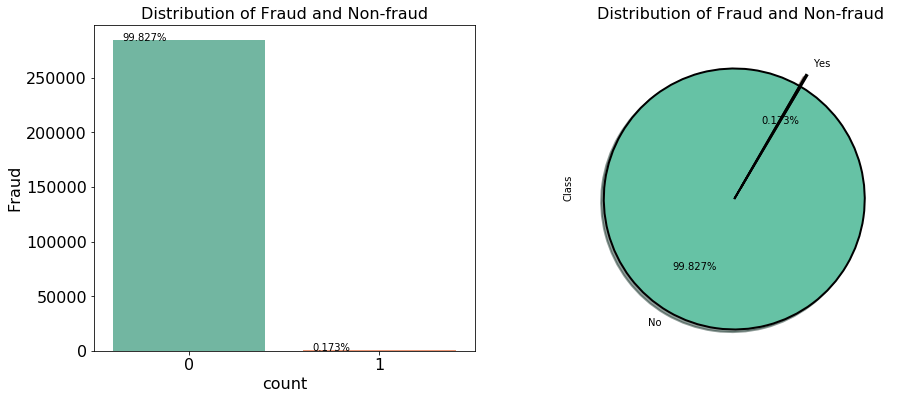

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,6))
plt.subplot(121)
ap = sns.countplot(x= 'Class', data = df,palette="Set2")
for p in ap.patches:
    ap.annotate('{:1.3f}%'.format((p.get_height()*100)/float(len(df["Class"]))), (p.get_x()+0.05, p.get_height()+20))  
plt.xticks(size = 16)
plt.ylabel('Fraud' , size =16)
plt.yticks(size = 16)
plt.xlabel('count' , size =16)
plt.title("Distribution of Fraud and Non-fraud", size =16)
plt.subplot(122)
pie_plot("Class")
plt.title("Distribution of Fraud and Non-fraud", size =16)
plt.show()

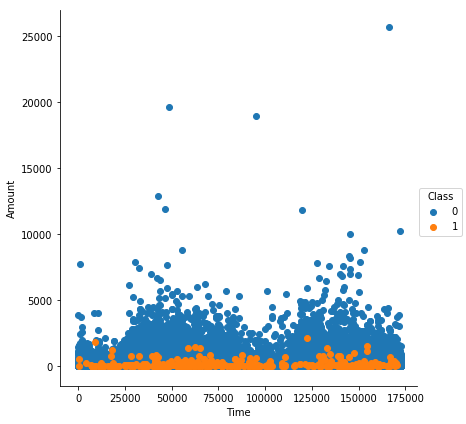

In [9]:
# Create a scatter plot to observe the distribution of classes with time
sns.FacetGrid(df,hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

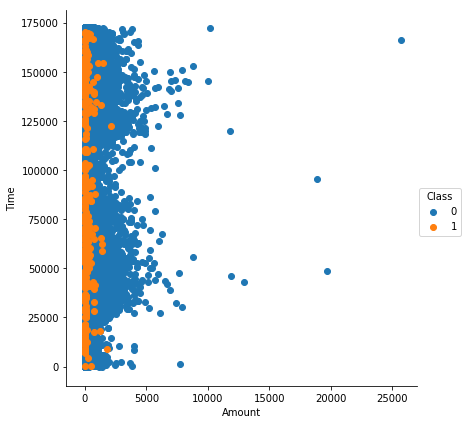

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.FacetGrid(df,hue="Class", size = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

In [11]:
data = df.drop(['Time'], axis=1)

In [12]:
X = data.drop(['Class'], axis=1)
y = data['Class']  #class variable

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [14]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
356
136


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead

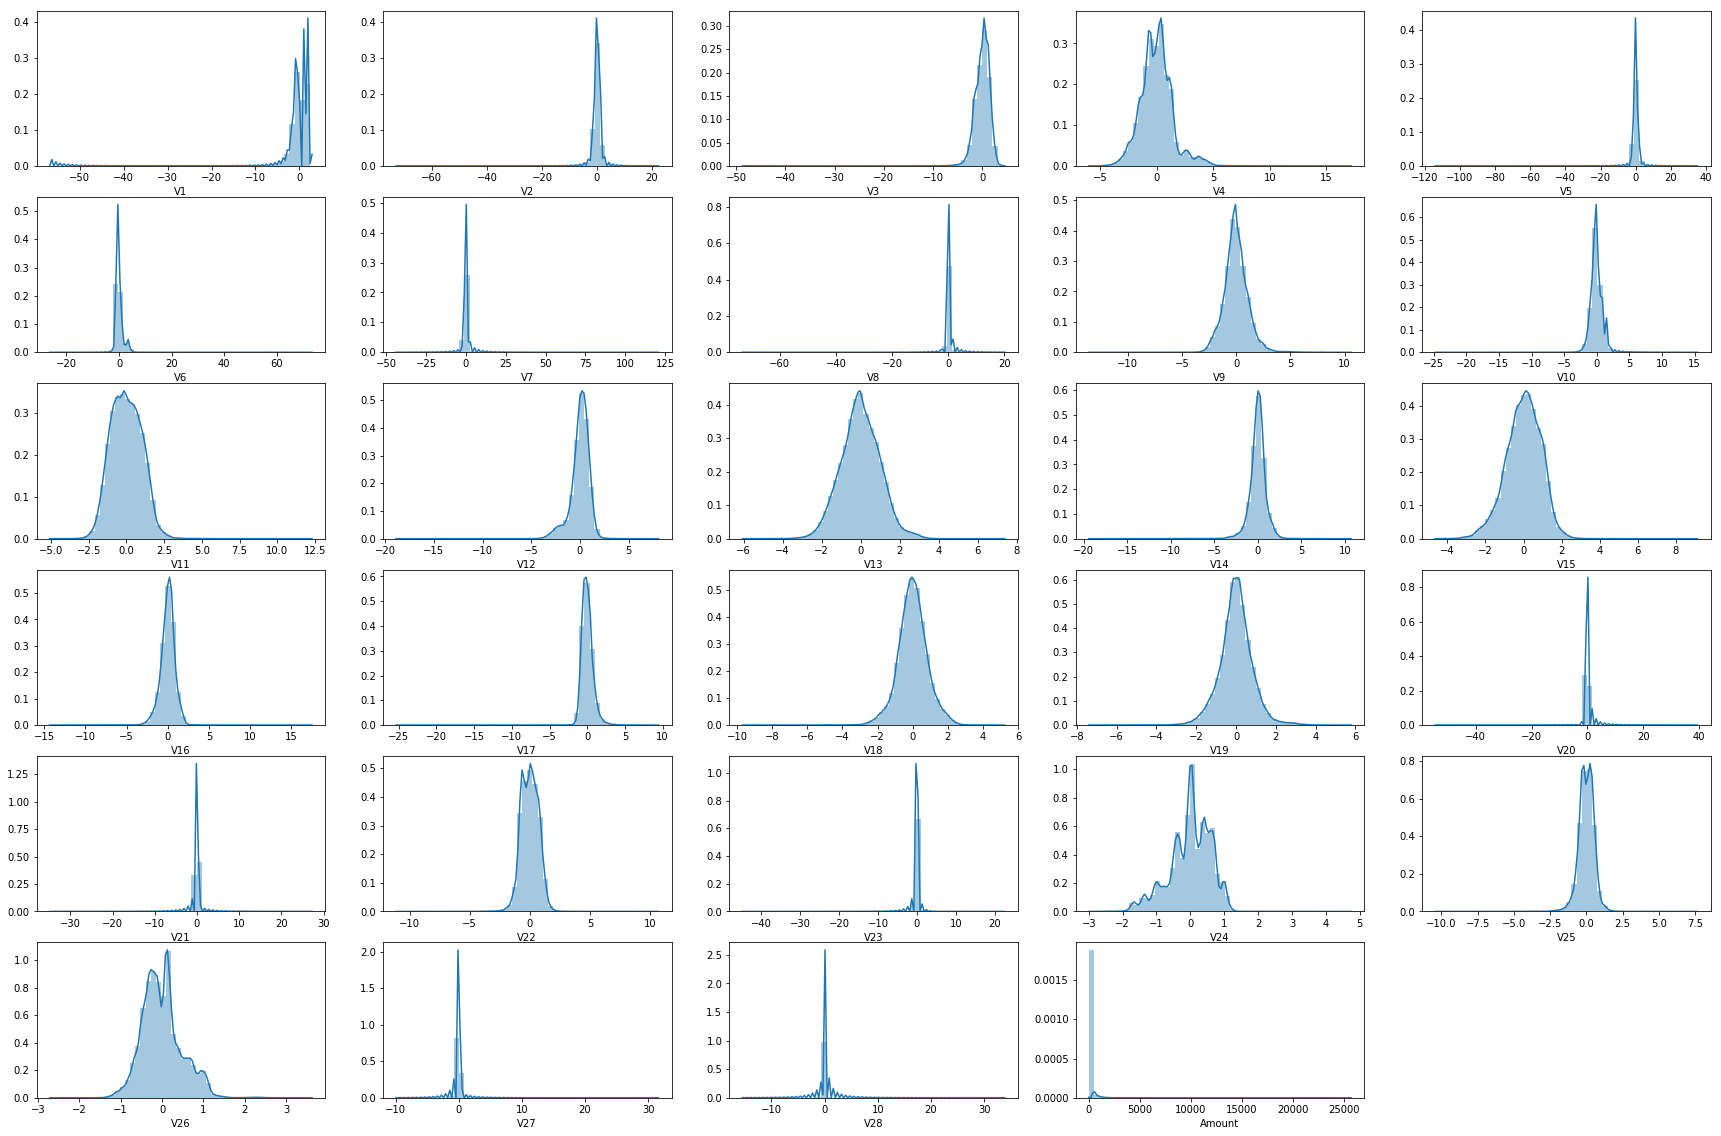

In [15]:
# plot the histogram of a variable from the dataset to see the skewness
import itertools
a = X_train.columns
plt.figure(figsize=(30,20))
for i,j in itertools.zip_longest(a, range(len(a))):
    plt.subplot(6,5,j+1)
    ax = sns.distplot(X_train[i])

In [16]:
# - Apply : preprocessing.PowerTransformer(`) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=False)
pt.fit(X_train)  
pt.transform(X_train)    
pt.transform(X_test)

array([[-4.18364953,  7.79983841, -6.67283651, ..., -4.76978665,
        -3.40066555,  1.60046698],
       [-0.03977015, -1.58333823, -0.25001327, ...,  0.09360672,
         0.32749998,  1.78884857],
       [ 0.81304767, -0.45045274, -0.03547839, ...,  0.02029389,
         0.02678043,  0.22557589],
       ...,
       [ 0.25958763, -0.69953647,  0.76412165, ...,  0.13668507,
         0.19334261,  1.26503941],
       [ 1.47378899,  0.02346921, -1.15579502, ..., -0.16065488,
        -0.08387418, -1.57502145],
       [ 0.54146702, -0.13130331,  0.95742032, ...,  0.19082209,
         0.1222844 , -0.42704166]])

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead

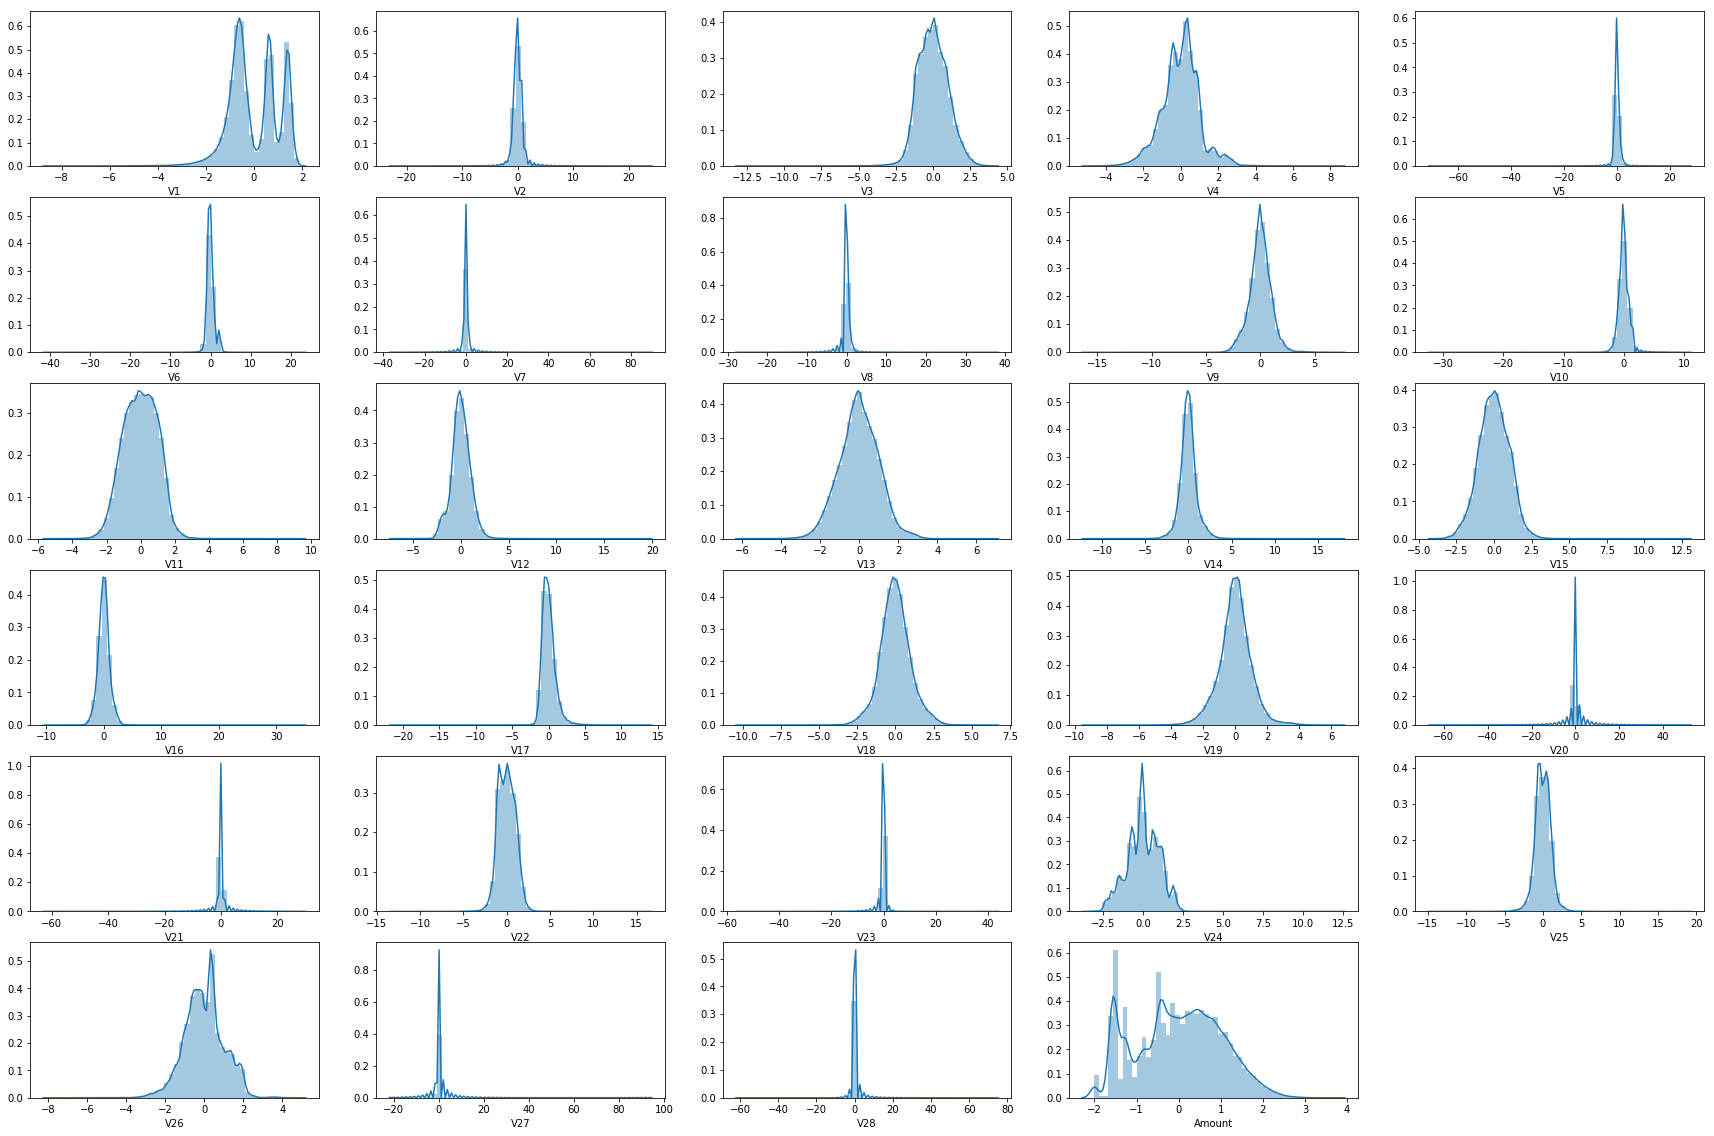

In [17]:
# plot the histogram of a variable from the dataset again to see the result 
a = X_train.columns
plt.figure(figsize=(30,20))
for i,j in itertools.zip_longest(a, range(len(a))):
    plt.subplot(6,5,j+1)
    ax = sns.distplot(X_train[i])

In [18]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [19]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [20]:
def getModelMetrics(actual_fraud=False,pred_fraud=False):
    print("F1 Score : {:.2f}".format(f1_score(actual_fraud,pred_fraud)))
    print("Recall_score : {:.2f}".format(recall_score(actual_fraud,pred_fraud)))
    print("Precision_score : {:.2f}".format(precision_score(actual_fraud,pred_fraud)))
    print("Roc_auc_score : {:.2f}".format(roc_auc_score(actual_fraud,pred_fraud)))

In [21]:
def predictFraudWithProb(model,X,y,prob):
    # Funtion to predict the fraud using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'fraud':y, 'fraud_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if fraud_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.fraud_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.fraud,y_df.final_predicted)
    return y_df

In [22]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as fraud/non-fraud
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.fraud_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
 
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.fraud, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [24]:
def tuneParamas(X, y, model,dict1,cv):
    random_search = RandomizedSearchCV(model, dict1, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
    random_result = random_search.fit(X, y)
    # summarize results
    print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
    means = random_result.cv_results_['mean_test_score']
    stds = random_result.cv_results_['std_test_score']
    params = random_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    return random_result.best_params_

# A. Model Building with imbalance data

## Model 1: Logistic Regresion

In [26]:

from sklearn.linear_model import LogisticRegression
# define models and parameters
lr0 = LogisticRegression()
solvers = ['newton-cg', 'sag', 'liblinear','saga']
penalty = ['l2']
c_values = [100,10, 1.0]
# define random search
dict1 = dict(solver=solvers,penalty=penalty,C=c_values)
cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
p1 = tuneParamas(X_train,y_train,lr0,dict1,cv1)

Best: 0.978128 using {'solver': 'saga', 'penalty': 'l2', 'C': 10}
0.974625 (0.007347) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
0.974620 (0.007348) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
0.978122 (0.006771) with: {'solver': 'saga', 'penalty': 'l2', 'C': 1.0}
0.974615 (0.007349) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
0.977572 (0.006691) with: {'solver': 'sag', 'penalty': 'l2', 'C': 10}
0.974679 (0.007340) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
0.977578 (0.006695) with: {'solver': 'sag', 'penalty': 'l2', 'C': 100}
0.978128 (0.006764) with: {'solver': 'saga', 'penalty': 'l2', 'C': 10}
0.974724 (0.007330) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}
0.975199 (0.007234) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [27]:
print(p1)

{'solver': 'saga', 'penalty': 'l2', 'C': 10}


In [28]:
lr1 = LogisticRegression(penalty='l2',solver = 'saga',C = 10)
lr1.fit(X_train, y_train)

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# predictions on Test data
y_pred_test_lr1 = lr1.predict(X_test)
getModelMetrics(y_test,y_pred_test_lr1)

F1 Score : 0.74
Recall_score : 0.64
Precision_score : 0.87
Roc_auc_score : 0.82


In [30]:
cut_off_prob=0.5
y_train_df = predictFraudWithProb(lr1,X_train,y_train,cut_off_prob)
y_train_df.head()

F1 Score : 0.73
Recall_score : 0.62
Precision_score : 0.90
Roc_auc_score : 0.81


,fraud,fraud_Prob,final_predicted
2557,0,0.000610,0
247823,0,0.001357,0
152342,0,0.001040,0
103385,0,0.001105,0
8771,0,0.000451,0


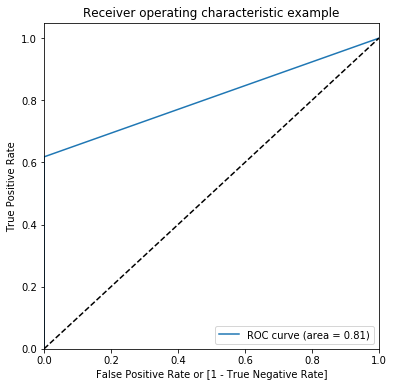

(array([0.00000000e+00, 1.25623091e-04, 1.00000000e+00]),
 array([0.        , 0.61797753, 1.        ]),
 array([2, 1, 0]))

In [31]:
draw_roc(y_train_df.fraud, y_train_df.final_predicted)

In [32]:
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.fraud, y_train_df.final_predicted)))

roc_auc_score : 0.81


     prob  accuracy     sensi     speci
0.0   0.0  0.001786  1.000000  0.000000
0.1   0.1  0.999278  0.803371  0.999628
0.2   0.2  0.999378  0.755618  0.999814
0.3   0.3  0.999333  0.713483  0.999844
0.4   0.4  0.999212  0.640449  0.999854
0.5   0.5  0.999192  0.617978  0.999874
0.6   0.6  0.999147  0.589888  0.999879
0.7   0.7  0.999082  0.553371  0.999879
0.8   0.8  0.999022  0.519663  0.999879
0.9   0.9  0.998917  0.457865  0.999884


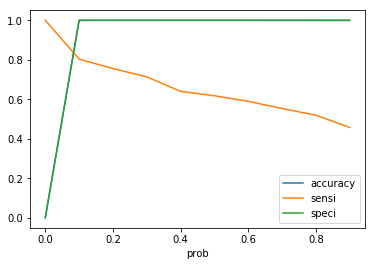

In [33]:
findOptimalCutoff(y_train_df)

In [34]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.1
tr1= predictFraudWithProb(lr1,X_train,y_train,cut_off_prob)

F1 Score : 0.80
Recall_score : 0.80
Precision_score : 0.79
Roc_auc_score : 0.90


In [35]:
# predicting with the choosen cut-off on test
tt1=  predictFraudWithProb(lr1,X_test,y_test,cut_off_prob)

F1 Score : 0.81
Recall_score : 0.83
Precision_score : 0.80
Roc_auc_score : 0.92


## Model 2 Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt0 = DecisionTreeClassifier(max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
dt0.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [37]:
y_pred_train_dt0 = dt0.predict(X_train)

In [38]:
# for train dataset
getModelMetrics( y_train,y_pred_train_dt0)

F1 Score : 0.65
Recall_score : 0.60
Precision_score : 0.72
Roc_auc_score : 0.80


In [39]:
# Predict testdataset
y_pred_test_dt0 = dt0.predict(X_test)
getModelMetrics( y_test,y_pred_test_dt0)

F1 Score : 0.64
Recall_score : 0.61
Precision_score : 0.68
Roc_auc_score : 0.80


In [40]:
# Create the parameter grid based on the results of random search 
l1 = range(5,15)
l2 = range(50, 400, 20)
l3 = range(50, 400, 20)
l4 = [8,10,12,14, 15, 16, 17, 18]
dict2 = dict(max_depth = l1, min_samples_leaf = l2, min_samples_split = l3, max_features= l4)

# Create a based model
dt1 = DecisionTreeClassifier(random_state=42)
cv2 = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
p2 = tuneParamas(X_train,y_train,dt1,dict2,cv2)

Best: 0.941613 using {'min_samples_split': 330, 'min_samples_leaf': 70, 'max_features': 17, 'max_depth': 8}
0.924410 (0.023681) with: {'min_samples_split': 190, 'min_samples_leaf': 110, 'max_features': 12, 'max_depth': 12}
0.928891 (0.014484) with: {'min_samples_split': 150, 'min_samples_leaf': 290, 'max_features': 12, 'max_depth': 13}
0.931651 (0.017633) with: {'min_samples_split': 190, 'min_samples_leaf': 350, 'max_features': 16, 'max_depth': 13}
0.931732 (0.027530) with: {'min_samples_split': 390, 'min_samples_leaf': 90, 'max_features': 8, 'max_depth': 11}
0.939827 (0.017435) with: {'min_samples_split': 290, 'min_samples_leaf': 350, 'max_features': 15, 'max_depth': 14}
0.941613 (0.017257) with: {'min_samples_split': 330, 'min_samples_leaf': 70, 'max_features': 17, 'max_depth': 8}
0.935611 (0.019957) with: {'min_samples_split': 170, 'min_samples_leaf': 270, 'max_features': 17, 'max_depth': 12}
0.917054 (0.017922) with: {'min_samples_split': 110, 'min_samples_leaf': 130, 'max_features

In [41]:
print(p2)

{'min_samples_split': 330, 'min_samples_leaf': 70, 'max_features': 17, 'max_depth': 8}


In [42]:
dt2 = DecisionTreeClassifier(min_samples_split=330,min_samples_leaf=70,max_features=17,max_depth=8,random_state=10)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=17, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=70, min_samples_split=330,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [43]:
# predictions on Test data
y_pred_test_dt2 = dt2.predict(X_test)
getModelMetrics(y_test,y_pred_test_dt2)

F1 Score : 0.70
Recall_score : 0.76
Precision_score : 0.64
Roc_auc_score : 0.88


In [44]:
# predictions on Train data
y_pred_train_dt2 = dt2.predict(X_train)
getModelMetrics(y_train,y_pred_train_dt2)

F1 Score : 0.74
Recall_score : 0.77
Precision_score : 0.72
Roc_auc_score : 0.89


## Model 3 Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf0 = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)
rf0.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [47]:
# predictions on Test data
y_pred_test_rf0 = rf0.predict(X_test)
getModelMetrics(y_test,y_pred_test_rf0)

F1 Score : 0.70
Recall_score : 0.59
Precision_score : 0.85
Roc_auc_score : 0.79


In [48]:
# predictions on Train data
y_pred_train_rf0 = rf0.predict(X_train)
getModelMetrics(y_train,y_pred_train_rf0)

F1 Score : 0.69
Recall_score : 0.56
Precision_score : 0.87
Roc_auc_score : 0.78


In [49]:
dict3 = {'max_depth': range(10, 30, 10),
             'n_estimators': range(50, 150, 25),
             'max_features': [4, 8, 14, 20, 24],
             'min_samples_leaf': range(100, 400, 50),
             'min_samples_split': range(50, 300, 50),
             }
rf1 = RandomForestClassifier(random_state=10)
cv3 = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)
p3 = tuneParamas(X_train,y_train,rf1,dict3,cv3)

Best: 0.968940 using {'n_estimators': 100, 'min_samples_split': 100, 'min_samples_leaf': 150, 'max_features': 8, 'max_depth': 10}
0.966460 (0.008271) with: {'n_estimators': 50, 'min_samples_split': 50, 'min_samples_leaf': 300, 'max_features': 4, 'max_depth': 10}
0.968940 (0.006782) with: {'n_estimators': 100, 'min_samples_split': 100, 'min_samples_leaf': 150, 'max_features': 8, 'max_depth': 10}
0.967311 (0.007160) with: {'n_estimators': 75, 'min_samples_split': 250, 'min_samples_leaf': 300, 'max_features': 20, 'max_depth': 20}
0.966003 (0.005653) with: {'n_estimators': 50, 'min_samples_split': 50, 'min_samples_leaf': 100, 'max_features': 4, 'max_depth': 10}
0.968500 (0.008068) with: {'n_estimators': 100, 'min_samples_split': 250, 'min_samples_leaf': 250, 'max_features': 20, 'max_depth': 10}
0.966727 (0.009381) with: {'n_estimators': 125, 'min_samples_split': 200, 'min_samples_leaf': 200, 'max_features': 24, 'max_depth': 10}
0.966689 (0.009694) with: {'n_estimators': 75, 'min_samples_sp

In [50]:
print(p3)

{'n_estimators': 100, 'min_samples_split': 100, 'min_samples_leaf': 150, 'max_features': 8, 'max_depth': 10}


In [51]:
rf2 = RandomForestClassifier(n_estimators=100, min_samples_split=100 ,min_samples_leaf=150 
                             ,max_features= 8,max_depth=10,random_state=10)
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [52]:
# predictions on Test data
y_pred_test_rf2 = rf2.predict(X_test)
getModelMetrics(y_test,y_pred_test_rf2)

F1 Score : 0.69
Recall_score : 0.60
Precision_score : 0.83
Roc_auc_score : 0.80


In [53]:
# predictions on Train data
y_pred_train_rf2 = rf2.predict(X_train)
getModelMetrics(y_train,y_pred_train_rf2)

F1 Score : 0.70
Recall_score : 0.59
Precision_score : 0.86
Roc_auc_score : 0.79


## Model 4: XGBoost

In [54]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [55]:
xgb0  = XGBClassifier(random_state=42)
xgb0.fit(X_train,y_train)

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:06:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [56]:
# predictions on Test data
y_pred_test_xgb0 = xgb0.predict(X_test)
getModelMetrics(y_test,y_pred_test_xgb0)

F1 Score : 0.89
Recall_score : 0.84
Precision_score : 0.95
Roc_auc_score : 0.92


In [57]:
# predictions on Train data
y_pred_train_xgb0 = xgb0.predict(X_train)
getModelMetrics(y_train,y_pred_train_xgb0)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


In [58]:
dict4 = {'max_depth':range(3,10,2),
               'min_child_weight':range(1,6,2),
               'n_estimators': range(50,200,20),
               'gamma': [i/10.0 for i in range(0,5)],
               'learning_rate':[0.1,0.2,0.3,0.4],
              }
xgb1 = XGBClassifier(n_jobs= -1,random_state=42)
cv4 = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)
p4 = tuneParamas(X_train,y_train,xgb1,dict4,cv4)

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:28:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.977623 using {'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1}
0.972629 (0.006404) with: {'n_estimators': 170, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.1}
0.969214 (0.008842) with: {'n_estimators': 90, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.3, 'gamma': 0.0}
0.977623 (0.004777) with: {'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1}
0.973705 (0.007661) with: {'n_estimators': 90, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.3}
0.972733 (0.005034) with: {'n_estimators': 170, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.3}
0.973510 (0.005766)

In [59]:
print(p4)

{'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1}


In [60]:
xgb2 = XGBClassifier(learning_rate =0.2,max_depth = 5,min_child_weight=5,n_estimators=50,
                     gamma= 0.1 ,n_jobs= -1,random_state=42)
xgb2.fit(X_train, y_train)

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:29:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [61]:
# predictions on Test data
y_pred_test_xgb2 = xgb2.predict(X_test)
getModelMetrics(y_test,y_pred_test_xgb0)

F1 Score : 0.89
Recall_score : 0.84
Precision_score : 0.95
Roc_auc_score : 0.92


In [62]:
# predictions on Train data
y_pred_train_xgb2 = xgb2.predict(X_train)
getModelMetrics(y_train,y_pred_train_xgb0)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


## Model 5:  SVM

In [63]:
from sklearn.svm import SVC

In [64]:
# instantiate an object of class SVC()
# note that we are using cost C=1
svm0 = SVC(C = 1)
svm0.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
# predictions on Test data
y_pred_test_svm0 = svm0.predict(X_test)
getModelMetrics(y_test,y_pred_test_svm0)

F1 Score : 0.78
Recall_score : 0.68
Precision_score : 0.92
Roc_auc_score : 0.84


In [66]:
# predictions on Train data
y_pred_train_svm0 = svm0.predict(X_train)
getModelMetrics(y_train,y_pred_train_svm0)

F1 Score : 0.89
Recall_score : 0.81
Precision_score : 0.99
Roc_auc_score : 0.91


## Model 6: KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn0=KNeighborsClassifier(n_neighbors=3)
knn0.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [69]:
# predictions on Test data
y_pred_test_knn0 = knn0.predict(X_test)
getModelMetrics(y_test,y_pred_test_knn0)

F1 Score : 0.84
Recall_score : 0.80
Precision_score : 0.87
Roc_auc_score : 0.90


In [70]:
# predictions on Train data
y_pred_train_knn0 = knn0.predict(X_train)
getModelMetrics(y_train,y_pred_train_knn0)

F1 Score : 0.88
Recall_score : 0.80
Precision_score : 0.97
Roc_auc_score : 0.90


### Imbalanced data model summary

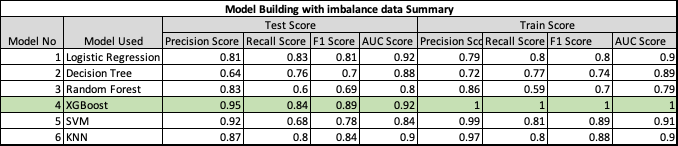

# B. Model building with balancing Classes - Random Oversampling

In [48]:
from imblearn.over_sampling import RandomOverSampler

In [49]:
ros = RandomOverSampler(random_state=0)

In [27]:
import pandas as pd
print(pd.__version__)

1.1.5


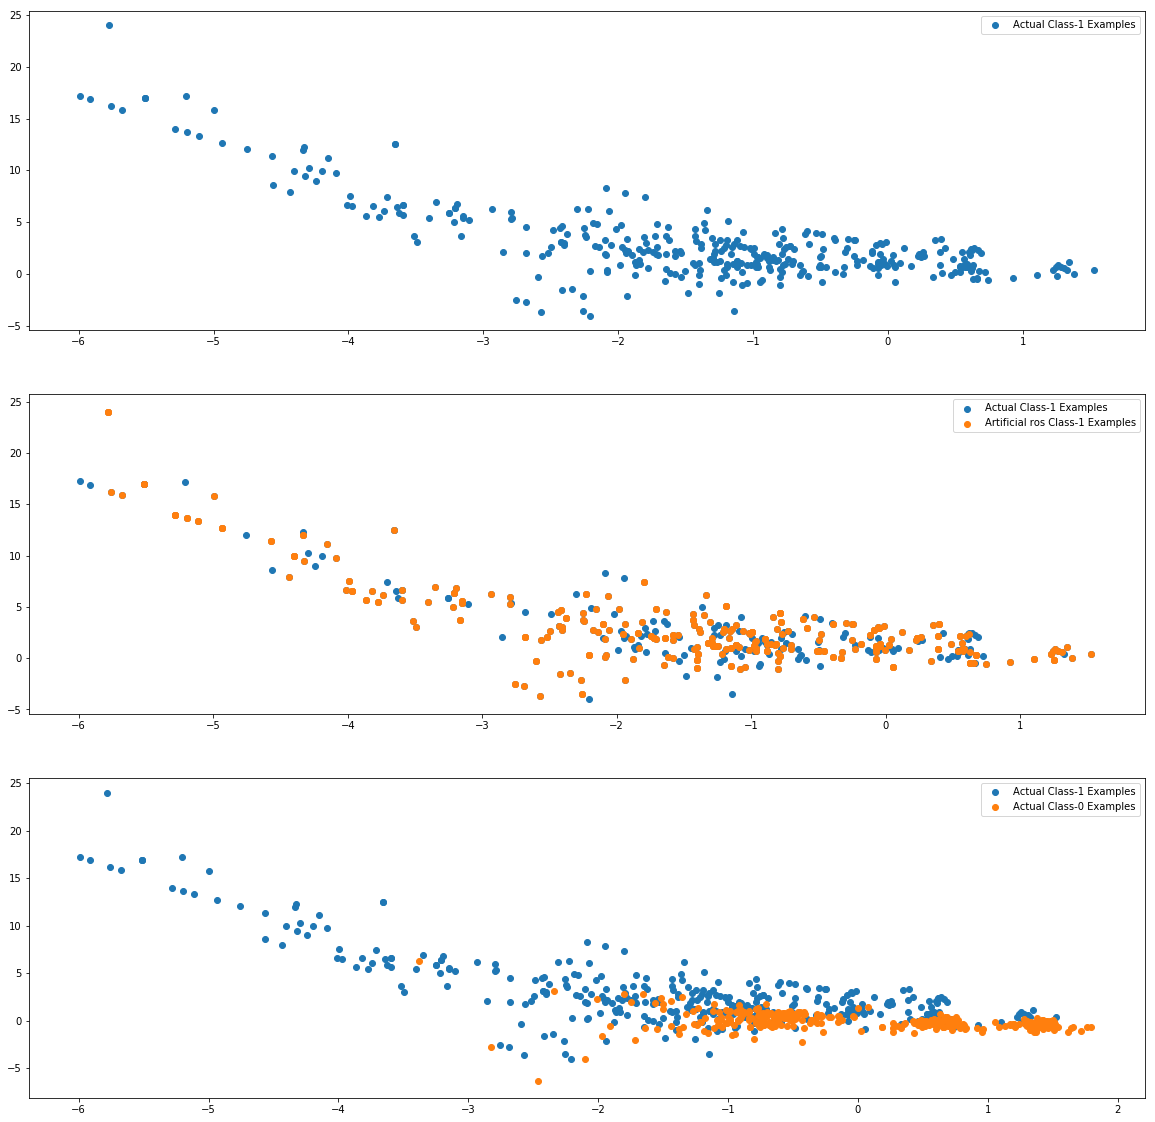

In [50]:
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_ros_1 = X_train_ros[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ros_1.iloc[:X_train_1.shape[0], 0], X_train_ros_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ros Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## Model 7: Logistic Regresion

In [30]:
from sklearn.linear_model import LogisticRegression
# define models and parameters
lr2 = LogisticRegression()
solvers = ['newton-cg', 'sag', 'liblinear','saga']
penalty = ['l2']
c_values = [100,10, 1.0]
# define random search
dict5 = dict(solver=solvers,penalty=penalty,C=c_values)
cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
p5 = tuneParamas(X_train_ros,y_train_ros,lr2,dict5,cv1)

Best: 0.986212 using {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
0.986212 (0.000367) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
0.986209 (0.000367) with: {'solver': 'sag', 'penalty': 'l2', 'C': 1.0}
0.986181 (0.000370) with: {'solver': 'saga', 'penalty': 'l2', 'C': 10}
0.986211 (0.000367) with: {'solver': 'sag', 'penalty': 'l2', 'C': 100}
0.986211 (0.000367) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
0.986210 (0.000367) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}
0.986181 (0.000370) with: {'solver': 'saga', 'penalty': 'l2', 'C': 100}
0.986179 (0.000370) with: {'solver': 'saga', 'penalty': 'l2', 'C': 1.0}
0.986209 (0.000367) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
0.986212 (0.000367) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}


In [31]:
print(p5)

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}


In [32]:
lr3 = LogisticRegression(penalty='l2',solver = 'newton-cg',C = 100)
lr3.fit(X_train_ros, y_train_ros)

LogisticRegression(C=100, solver='newton-cg')

In [33]:
# predictions on Test data
y_pred_test_lr3 = lr3.predict(X_test)
getModelMetrics(y_test,y_pred_test_lr3)

F1 Score : 0.09
Recall_score : 0.93
Precision_score : 0.05
Roc_auc_score : 0.95


In [34]:
cut_off_prob=0.5
y_train_df = predictFraudWithProb(lr3,X_train_ros,y_train_ros,cut_off_prob)
y_train_df.head()

F1 Score : 0.94
Recall_score : 0.92
Precision_score : 0.97
Roc_auc_score : 0.94


,fraud,fraud_Prob,final_predicted
0,0,0.012742,0
1,0,0.053010,0
2,0,0.008660,0
3,0,0.036530,0
4,0,0.002488,0


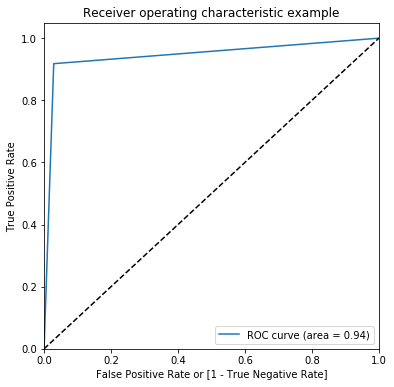

(array([0.        , 0.02883804, 1.        ]),
 array([0.        , 0.91789777, 1.        ]),
 array([2, 1, 0]))

In [35]:
draw_roc(y_train_df.fraud, y_train_df.final_predicted)

In [36]:
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.fraud, y_train_df.final_predicted)))

roc_auc_score : 0.94


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.884716  0.982800  0.786632
0.2   0.2  0.927242  0.962921  0.891562
0.3   0.3  0.938663  0.943213  0.934113
0.4   0.4  0.944711  0.932003  0.957419
0.5   0.5  0.944530  0.917898  0.971162
0.6   0.6  0.944045  0.906451  0.981639
0.7   0.7  0.943228  0.898024  0.988433
0.8   0.8  0.934299  0.876055  0.992543
0.9   0.9  0.927872  0.858991  0.996754


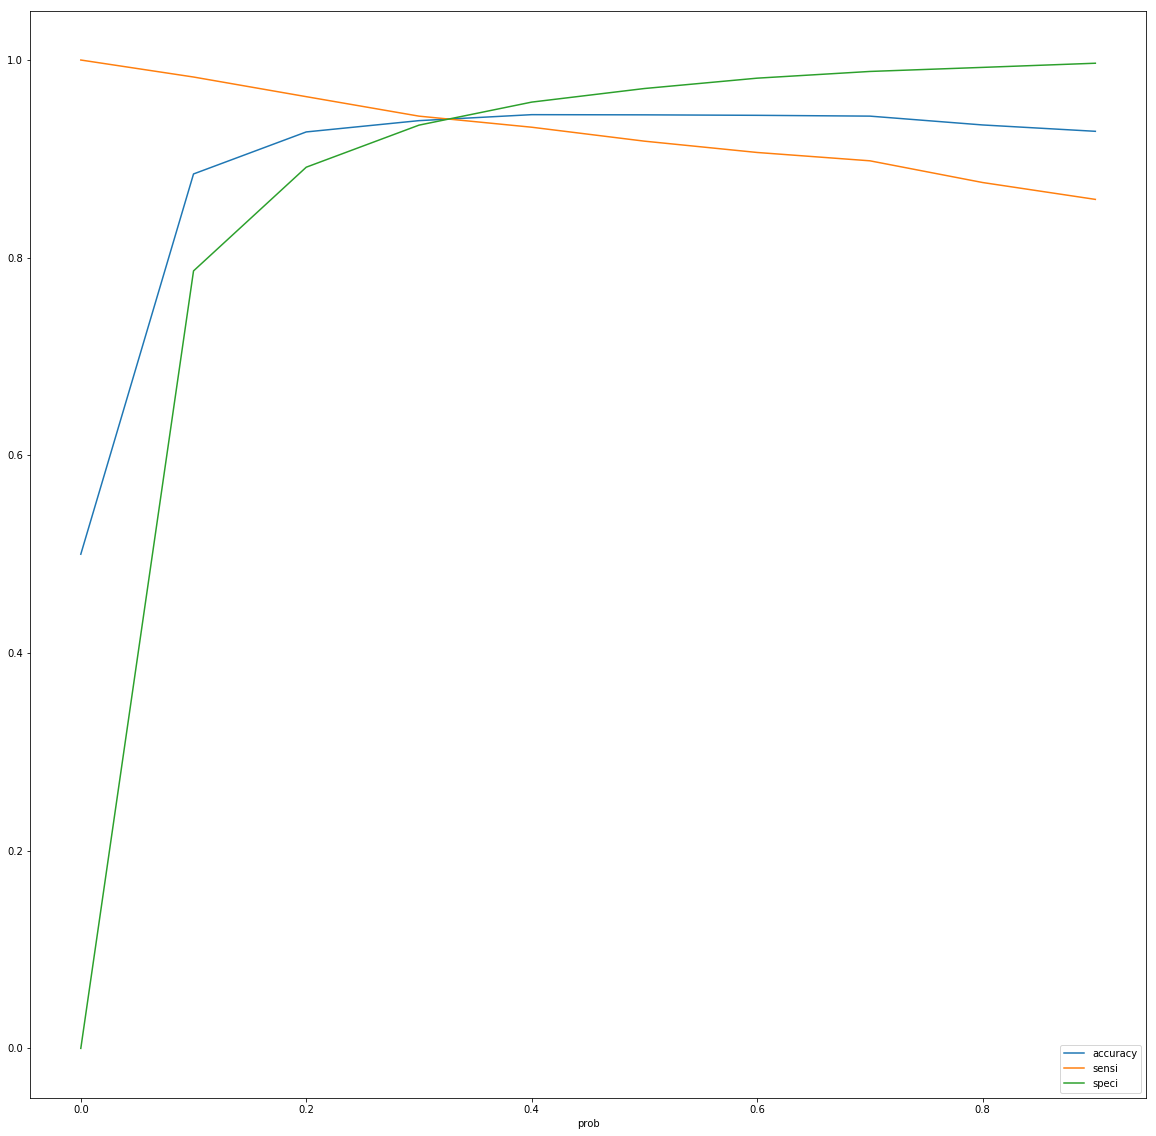

In [37]:
findOptimalCutoff(y_train_df)

In [38]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.3
tr2= predictFraudWithProb(lr3,X_train_ros,y_train_ros,cut_off_prob)

F1 Score : 0.94
Recall_score : 0.94
Precision_score : 0.93
Roc_auc_score : 0.94


In [39]:
# predicting with the choosen cut-off on test
tt2=  predictFraudWithProb(lr3,X_test,y_test,cut_off_prob)

F1 Score : 0.04
Recall_score : 0.96
Precision_score : 0.02
Roc_auc_score : 0.95


## Model 8 Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt3 = DecisionTreeClassifier(max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
dt3.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=6, max_features='auto', min_samples_leaf=100,
                       min_samples_split=100, random_state=10)

In [41]:
y_pred_train_dt3 = dt3.predict(X_train_ros)

In [42]:
# for train dataset
getModelMetrics( y_train_ros,y_pred_train_dt3)

F1 Score : 0.95
Recall_score : 0.94
Precision_score : 0.95
Roc_auc_score : 0.95


In [43]:
# Predict testdataset
y_pred_test_dt3 = dt3.predict(X_test)
getModelMetrics( y_test,y_pred_test_dt3)

F1 Score : 0.06
Recall_score : 0.91
Precision_score : 0.03
Roc_auc_score : 0.93


In [44]:
# Create the parameter grid based on the results of random search 
l1 = range(5,15)
l2 = range(50, 400, 20)
l3 = range(50, 400, 20)
l4 = [8,10,12,14, 15, 16, 17, 18]
dict6 = dict(max_depth = l1, min_samples_leaf = l2, min_samples_split = l3, max_features= l4)

# Create a based model
dt4 = DecisionTreeClassifier(random_state=42)
cv2 = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
p6 = tuneParamas(X_train,y_train,dt4,dict6,cv2)

Best: 0.946536 using {'min_samples_split': 350, 'min_samples_leaf': 210, 'max_features': 15, 'max_depth': 9}
0.917200 (0.013277) with: {'min_samples_split': 210, 'min_samples_leaf': 130, 'max_features': 14, 'max_depth': 5}
0.928191 (0.018543) with: {'min_samples_split': 330, 'min_samples_leaf': 390, 'max_features': 18, 'max_depth': 5}
0.931163 (0.018992) with: {'min_samples_split': 270, 'min_samples_leaf': 150, 'max_features': 8, 'max_depth': 8}
0.941417 (0.018264) with: {'min_samples_split': 390, 'min_samples_leaf': 390, 'max_features': 18, 'max_depth': 6}
0.938928 (0.015398) with: {'min_samples_split': 110, 'min_samples_leaf': 370, 'max_features': 16, 'max_depth': 14}
0.946536 (0.025651) with: {'min_samples_split': 350, 'min_samples_leaf': 210, 'max_features': 15, 'max_depth': 9}
0.901499 (0.022766) with: {'min_samples_split': 370, 'min_samples_leaf': 90, 'max_features': 12, 'max_depth': 5}
0.929479 (0.027703) with: {'min_samples_split': 370, 'min_samples_leaf': 110, 'max_features': 

In [45]:
print(p6)

{'min_samples_split': 350, 'min_samples_leaf': 210, 'max_features': 15, 'max_depth': 9}


In [46]:
dt5 = DecisionTreeClassifier(min_samples_split=350,min_samples_leaf=210,max_features=15,max_depth=9,random_state=10)
dt5.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=9, max_features=15, min_samples_leaf=210,
                       min_samples_split=350, random_state=10)

In [47]:
# predictions on Test data
y_pred_test_dt5 = dt5.predict(X_test)
getModelMetrics(y_test,y_pred_test_dt5)

F1 Score : 0.21
Recall_score : 0.86
Precision_score : 0.12
Roc_auc_score : 0.93


In [49]:
# predictions on Train data
y_pred_train_dt5 = dt5.predict(X_train_ros)
getModelMetrics(y_train_ros,y_pred_train_dt5)

F1 Score : 0.99
Recall_score : 0.99
Precision_score : 0.99
Roc_auc_score : 0.99


## Model 9 Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf3 = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)
rf3.fit(X_train_ros,y_train_ros)

RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=100,
                       min_samples_split=50, n_estimators=80, random_state=10)

In [52]:
# predictions on Test data
y_pred_test_rf3 = rf3.predict(X_test)
getModelMetrics(y_test,y_pred_test_rf3)

F1 Score : 0.71
Recall_score : 0.90
Precision_score : 0.58
Roc_auc_score : 0.95


In [53]:
# predictions on Train data
y_pred_train_rf3 = rf3.predict(X_train_ros)
getModelMetrics(y_train_ros,y_pred_train_rf3)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


In [54]:
dict7 = {'max_depth': range(10, 30, 10),
             'n_estimators': range(50, 150, 25),
             'max_features': [4, 8, 14, 20, 24],
             'min_samples_leaf': range(100, 400, 50),
             'min_samples_split': range(50, 300, 50),
             }
rf4 = RandomForestClassifier(random_state=10)
cv3 = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)
p7 = tuneParamas(X_train_ros,y_train_ros,rf4,dict7,cv3)

Best: 0.999948 using {'n_estimators': 125, 'min_samples_split': 100, 'min_samples_leaf': 100, 'max_features': 14, 'max_depth': 20}
0.999913 (0.000013) with: {'n_estimators': 100, 'min_samples_split': 250, 'min_samples_leaf': 100, 'max_features': 8, 'max_depth': 10}
0.999823 (0.000017) with: {'n_estimators': 50, 'min_samples_split': 200, 'min_samples_leaf': 350, 'max_features': 4, 'max_depth': 20}
0.999948 (0.000006) with: {'n_estimators': 125, 'min_samples_split': 100, 'min_samples_leaf': 100, 'max_features': 14, 'max_depth': 20}
0.999893 (0.000015) with: {'n_estimators': 125, 'min_samples_split': 250, 'min_samples_leaf': 200, 'max_features': 20, 'max_depth': 20}
0.999727 (0.000056) with: {'n_estimators': 75, 'min_samples_split': 150, 'min_samples_leaf': 300, 'max_features': 8, 'max_depth': 10}
0.999908 (0.000014) with: {'n_estimators': 100, 'min_samples_split': 150, 'min_samples_leaf': 150, 'max_features': 24, 'max_depth': 20}
0.999801 (0.000061) with: {'n_estimators': 50, 'min_sample

In [55]:
print(p7)

{'n_estimators': 125, 'min_samples_split': 100, 'min_samples_leaf': 100, 'max_features': 14, 'max_depth': 20}


In [56]:
rf5 = RandomForestClassifier(n_estimators=125, min_samples_split=100 ,min_samples_leaf=100 
                             ,max_features= 14,max_depth=20,random_state=10)
rf5.fit(X_train_ros, y_train_ros)

RandomForestClassifier(max_depth=20, max_features=14, min_samples_leaf=100,
                       min_samples_split=100, n_estimators=125,
                       random_state=10)

In [57]:
# predictions on Test data
y_pred_test_rf5 = rf5.predict(X_test)
getModelMetrics(y_test,y_pred_test_rf5)

F1 Score : 0.65
Recall_score : 0.88
Precision_score : 0.52
Roc_auc_score : 0.94


In [58]:
# predictions on Train data
y_pred_train_rf5 = rf5.predict(X_train_ros)
getModelMetrics(y_train_ros,y_pred_train_rf5)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


## Model 10: XGBoost

In [59]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [60]:
xgb3  = XGBClassifier(random_state=42)
xgb3.fit(X_train_ros,y_train_ros)

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:30:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
# predictions on Test data
y_pred_test_xgb3 = xgb3.predict(X_test)
getModelMetrics(y_test,y_pred_test_xgb3)

F1 Score : 0.88
Recall_score : 0.86
Precision_score : 0.90
Roc_auc_score : 0.93


In [62]:
# predictions on Train data
y_pred_train_xgb3 = xgb3.predict(X_train_ros)
getModelMetrics(y_train_ros,y_pred_train_xgb3)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


In [63]:
dict8 = {'max_depth':range(3,10,2),
               'min_child_weight':range(1,6,2),
               'n_estimators': range(50,200,20),
               'gamma': [i/10.0 for i in range(0,5)],
               'learning_rate':[0.1,0.2,0.3,0.4],
              }
xgb4 = XGBClassifier(n_jobs= -1,random_state=42)
cv4 = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)
p8 = tuneParamas(X_train_ros,y_train_ros,xgb4,dict8,cv4)

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:03:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.999987 using {'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.4, 'gamma': 0.2}
0.999965 (0.000013) with: {'n_estimators': 70, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.2}
0.999963 (0.000009) with: {'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.0}
0.999983 (0.000012) with: {'n_estimators': 70, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 0.4}
0.999984 (0.000011) with: {'n_estimators': 90, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.2}
0.999972 (0.000012) with: {'n_estimators': 90, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.3}
0.999973 (0.000009)

In [64]:
print(p8)

{'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.4, 'gamma': 0.2}


In [65]:
xgb5 = XGBClassifier(learning_rate =0.4,max_depth = 9,min_child_weight=1,n_estimators=150,
                     gamma= 0.2 ,n_jobs= -1,random_state=42)
xgb5.fit(X_train_ros, y_train_ros)

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
# predictions on Test data
y_pred_test_xgb5 = xgb5.predict(X_test)
getModelMetrics(y_test,y_pred_test_xgb5)

F1 Score : 0.88
Recall_score : 0.85
Precision_score : 0.90
Roc_auc_score : 0.93


In [67]:
# predictions on Train data
y_pred_train_xgb5 = xgb5.predict(X_train_ros)
getModelMetrics(y_train_ros,y_pred_train_xgb5)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


## Model 11:  SVM

In [55]:
from sklearn.svm import SVC

In [56]:
# instantiate an object of class SVC()
# note that we are using cost C=1
svm1 = SVC(C = 1)
svm1.fit(X_train_ros, y_train_ros)

SVC(C=1)

In [57]:
# predictions on Test data
y_pred_test_svm1 = svm1.predict(X_test)
getModelMetrics(y_test,y_pred_test_svm1)

F1 Score : 0.19
Recall_score : 0.89
Precision_score : 0.10
Roc_auc_score : 0.94


In [58]:
# predictions on Train data
y_pred_train_svm2 = svm2.predict(X_train_ros)
getModelMetrics(y_train_ros,y_pred_train_svm2)

F1 Score : 0.98
Recall_score : 0.98
Precision_score : 0.99
Roc_auc_score : 0.98


## Model 12: KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn1=KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train_ros,y_train_ros)

KNeighborsClassifier(n_neighbors=3)

In [53]:
# predictions on Test data
y_pred_test_knn1 = knn1.predict(X_test)
getModelMetrics(y_test,y_pred_test_knn1)

F1 Score : 0.78
Recall_score : 0.85
Precision_score : 0.72
Roc_auc_score : 0.93


In [54]:
# predictions on Train data
y_pred_train_knn1 = knn1.predict(X_train_ros)
getModelMetrics(y_train_ros,y_pred_train_knn1)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


### Random Oversampling model summary

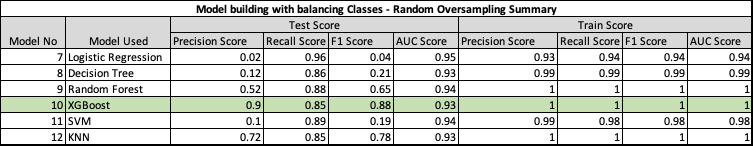

# C. Model building with balancing Classes - SMOTE

In [25]:
from imblearn import over_sampling

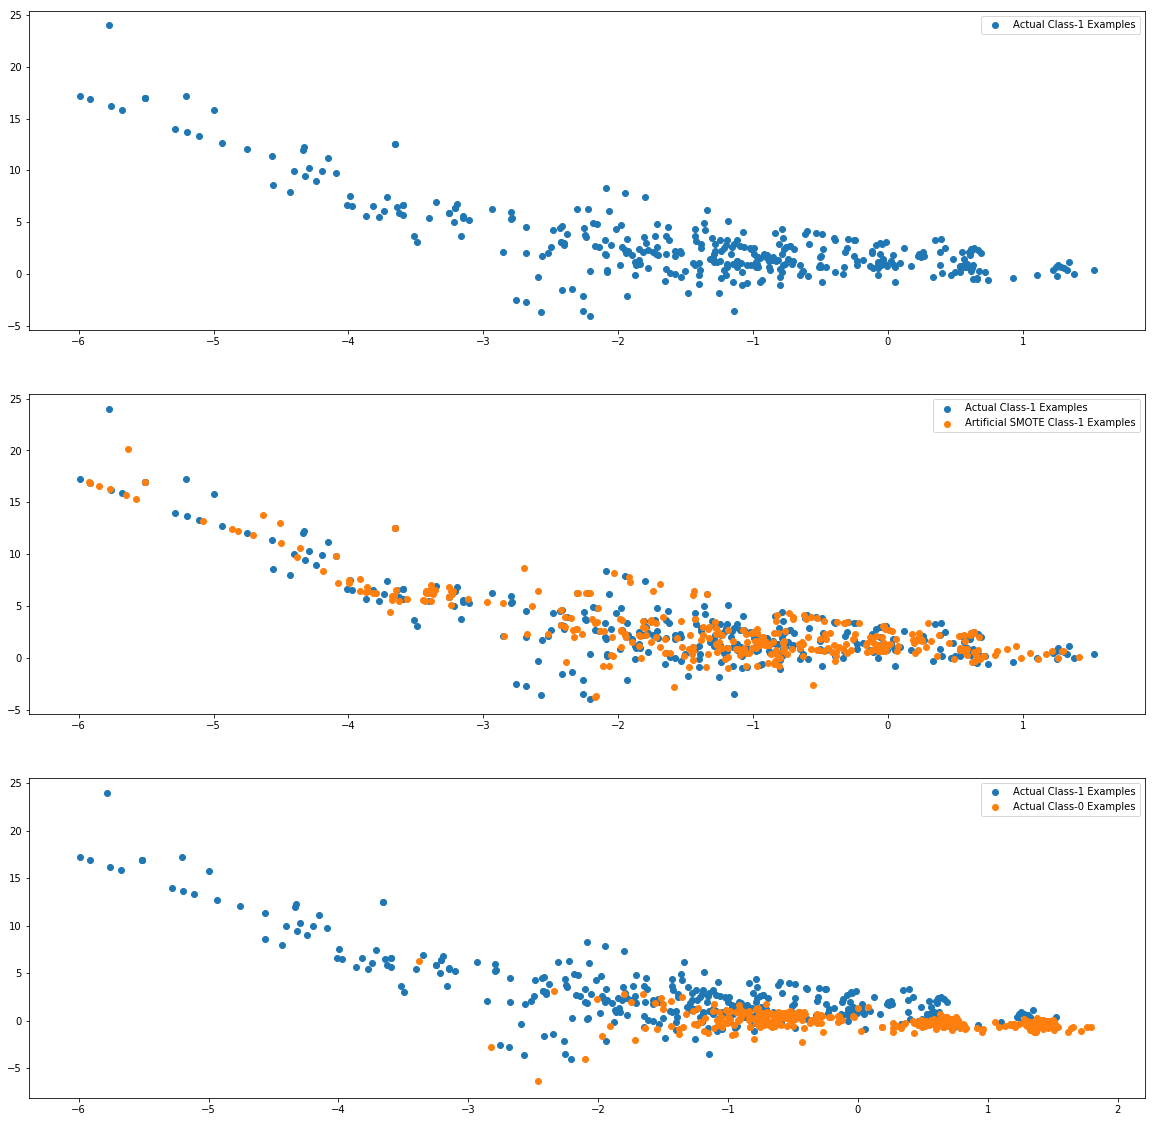

In [26]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## Model 13: Logistic Regresion

In [28]:
from sklearn.linear_model import LogisticRegression
# define models and parameters
lr4 = LogisticRegression()
solvers = ['newton-cg', 'sag', 'liblinear','saga']
penalty = ['l2']
c_values = [100,10, 1.0]
# define grid search
dict9 = dict(solver=solvers,penalty=penalty,C=c_values)
cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
p9 = tuneParamas(X_train_smote,y_train_smote,lr4,dict9,cv1)

Best: 0.989004 using {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
0.989001 (0.000213) with: {'solver': 'sag', 'penalty': 'l2', 'C': 10}
0.988969 (0.000208) with: {'solver': 'saga', 'penalty': 'l2', 'C': 10}
0.988999 (0.000213) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
0.989000 (0.000213) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
0.989004 (0.000214) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
0.988999 (0.000213) with: {'solver': 'sag', 'penalty': 'l2', 'C': 1.0}
0.989001 (0.000213) with: {'solver': 'sag', 'penalty': 'l2', 'C': 100}
0.989002 (0.000214) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}
0.988969 (0.000208) with: {'solver': 'saga', 'penalty': 'l2', 'C': 100}
0.988967 (0.000208) with: {'solver': 'saga', 'penalty': 'l2', 'C': 1.0}


In [29]:
print(p9)

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}


In [30]:
lr5 = LogisticRegression(penalty='l2',solver = 'newton-cg',C = 100)
lr5.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100, solver='newton-cg')

In [31]:
# predictions on Test data
y_pred_test_lr5 = lr5.predict(X_test)
getModelMetrics(y_test,y_pred_test_lr5)

F1 Score : 0.09
Recall_score : 0.93
Precision_score : 0.05
Roc_auc_score : 0.95


In [32]:
cut_off_prob=0.5
y_train_df = predictFraudWithProb(lr5,X_train_smote,y_train_smote,cut_off_prob)
y_train_df.head()

F1 Score : 0.94
Recall_score : 0.92
Precision_score : 0.97
Roc_auc_score : 0.94


,fraud,fraud_Prob,final_predicted
0,0,0.011645,0
1,0,0.034956,0
2,0,0.001988,0
3,0,0.040748,0
4,0,0.001198,0


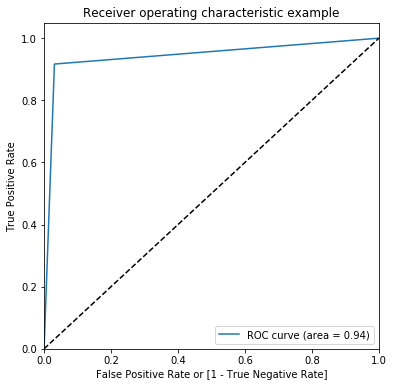

(array([0.        , 0.03093845, 1.        ]),
 array([0.        , 0.91672194, 1.        ]),
 array([2, 1, 0]))

In [33]:
draw_roc(y_train_df.fraud, y_train_df.final_predicted)

In [34]:
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.fraud, y_train_df.final_predicted)))

roc_auc_score : 0.94


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.890080  0.989980  0.790179
0.2   0.2  0.930226  0.969539  0.890914
0.3   0.3  0.941643  0.950479  0.932807
0.4   0.4  0.944017  0.931842  0.956193
0.5   0.5  0.942892  0.916722  0.969062
0.6   0.6  0.941696  0.904642  0.978750
0.7   0.7  0.939666  0.892803  0.986528
0.8   0.8  0.935080  0.878683  0.991478
0.9   0.9  0.925772  0.856991  0.994553


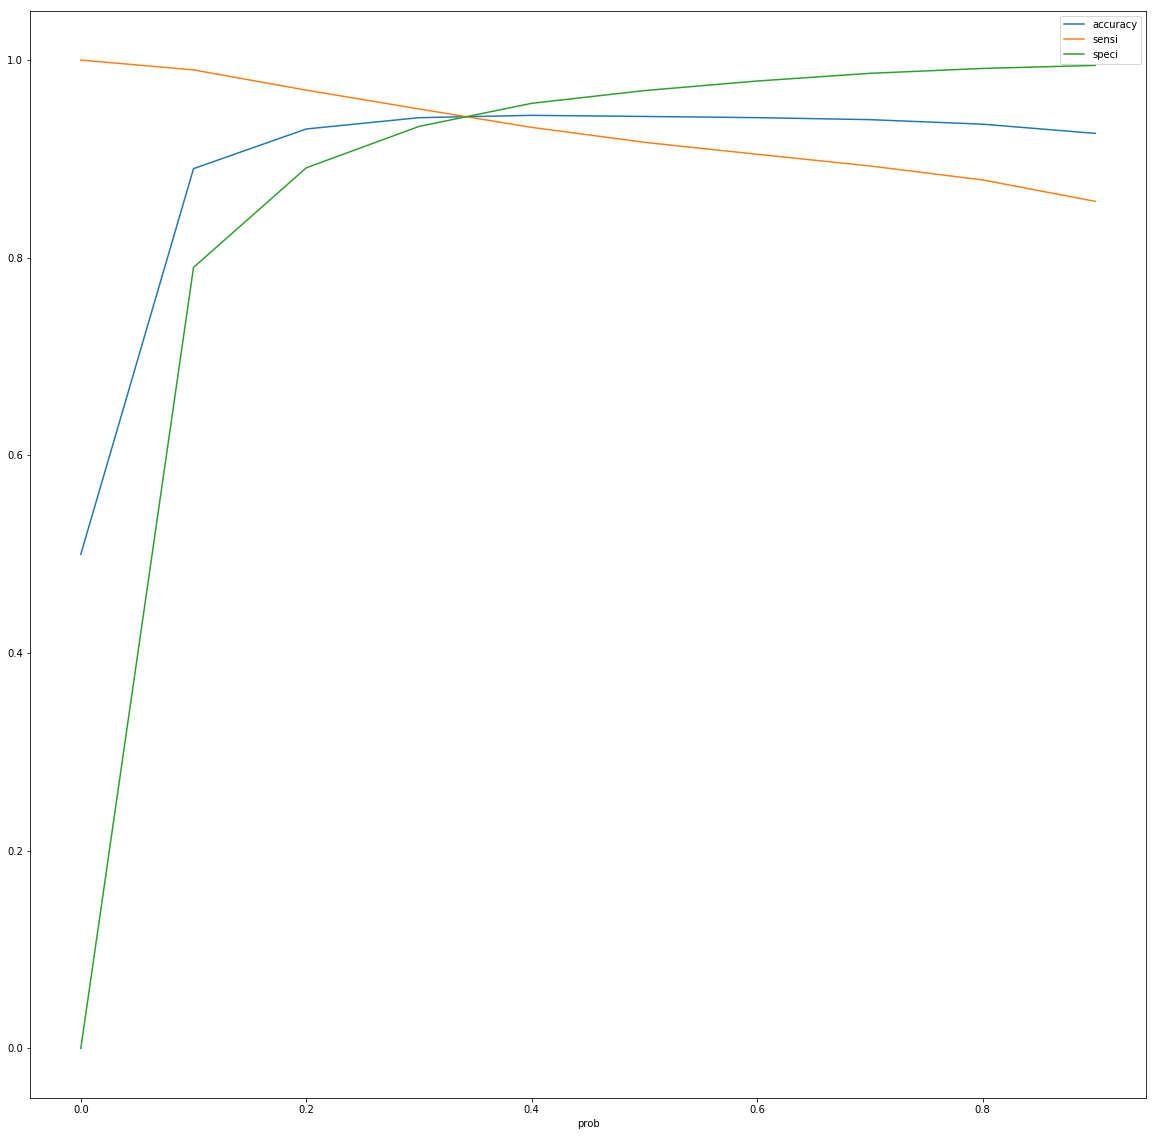

In [35]:
findOptimalCutoff(y_train_df)

In [36]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.37
tr3= predictFraudWithProb(lr5,X_train_smote,y_train_smote,cut_off_prob)

F1 Score : 0.94
Recall_score : 0.94
Precision_score : 0.95
Roc_auc_score : 0.94


In [37]:
# predicting with the choosen cut-off on test
tt3= predictFraudWithProb(lr5,X_test,y_test,cut_off_prob)

F1 Score : 0.06
Recall_score : 0.95
Precision_score : 0.03
Roc_auc_score : 0.95


## Model 14 Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt6 = DecisionTreeClassifier(max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
dt6.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=6, max_features='auto', min_samples_leaf=100,
                       min_samples_split=100, random_state=10)

In [39]:
y_pred_train_dt6 = dt6.predict(X_train_smote)

In [40]:
# for train dataset
getModelMetrics( y_train_smote,y_pred_train_dt6)

F1 Score : 0.94
Recall_score : 0.93
Precision_score : 0.95
Roc_auc_score : 0.94


In [41]:
# Predict testdataset
y_pred_test_dt6 = dt6.predict(X_test)
getModelMetrics( y_test,y_pred_test_dt6)

F1 Score : 0.06
Recall_score : 0.92
Precision_score : 0.03
Roc_auc_score : 0.94


In [42]:
# Create the parameter grid based on the results of random search 
l1 = range(5,15)
l2 = range(50, 400, 20)
l3 = range(50, 400, 20)
l4 = [8,10,12,15]
dict10 = dict(max_depth = l1, min_samples_leaf = l2, min_samples_split = l3, max_features= l4)

# Create a based model
dt7 = DecisionTreeClassifier(random_state=42)
cv2 = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
p10 = tuneParamas(X_train_smote,y_train_smote,dt7,dict10,cv2)

Best: 0.997896 using {'min_samples_split': 350, 'min_samples_leaf': 130, 'max_features': 12, 'max_depth': 13}
0.994117 (0.000636) with: {'min_samples_split': 350, 'min_samples_leaf': 230, 'max_features': 15, 'max_depth': 8}
0.994135 (0.001220) with: {'min_samples_split': 70, 'min_samples_leaf': 350, 'max_features': 10, 'max_depth': 10}
0.996722 (0.000612) with: {'min_samples_split': 50, 'min_samples_leaf': 190, 'max_features': 8, 'max_depth': 12}
0.992466 (0.001016) with: {'min_samples_split': 390, 'min_samples_leaf': 190, 'max_features': 12, 'max_depth': 8}
0.979287 (0.002514) with: {'min_samples_split': 50, 'min_samples_leaf': 130, 'max_features': 12, 'max_depth': 5}
0.995782 (0.001631) with: {'min_samples_split': 230, 'min_samples_leaf': 70, 'max_features': 8, 'max_depth': 11}
0.994413 (0.001597) with: {'min_samples_split': 250, 'min_samples_leaf': 110, 'max_features': 15, 'max_depth': 8}
0.974523 (0.003088) with: {'min_samples_split': 50, 'min_samples_leaf': 230, 'max_features': 8,

In [43]:
print(p10)

{'min_samples_split': 350, 'min_samples_leaf': 130, 'max_features': 12, 'max_depth': 13}


In [44]:
dt8 = DecisionTreeClassifier(min_samples_split=350,min_samples_leaf=130,max_features=12,max_depth=13,random_state=10)
dt8.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=13, max_features=12, min_samples_leaf=130,
                       min_samples_split=350, random_state=10)

In [45]:
# predictions on Test data
y_pred_test_dt8 = dt8.predict(X_test)
getModelMetrics(y_test,y_pred_test_dt8)

F1 Score : 0.15
Recall_score : 0.90
Precision_score : 0.08
Roc_auc_score : 0.94


In [46]:
# predictions on Train data
y_pred_train_dt8 = dt8.predict(X_train_smote)
getModelMetrics(y_train_smote,y_pred_train_dt8)

F1 Score : 0.98
Recall_score : 0.98
Precision_score : 0.98
Roc_auc_score : 0.98


## Model 15 Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf6 = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)
rf6.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=100,
                       min_samples_split=50, n_estimators=80, random_state=10)

In [49]:
# predictions on Test data
y_pred_test_rf6 = rf6.predict(X_test)
getModelMetrics(y_test,y_pred_test_rf6)

F1 Score : 0.59
Recall_score : 0.90
Precision_score : 0.44
Roc_auc_score : 0.95


In [50]:
# predictions on Train data
y_pred_train_rf6 = rf6.predict(X_train_smote)
getModelMetrics(y_train_smote,y_pred_train_rf6)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


In [51]:
dict11 = {'max_depth': range(10, 30, 10),
             'n_estimators': range(50, 150, 25),
             'max_features': [8, 14, 20],
             'min_samples_leaf': range(100, 300, 50),
             'min_samples_split': range(50, 300, 50),
             }
rf7 = RandomForestClassifier(random_state=10)
cv3 = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)
p11 = tuneParamas(X_train_smote,y_train_smote,rf7,dict11,cv3)

Best: 0.999598 using {'n_estimators': 100, 'min_samples_split': 250, 'min_samples_leaf': 100, 'max_features': 20, 'max_depth': 20}
0.998593 (0.000068) with: {'n_estimators': 100, 'min_samples_split': 150, 'min_samples_leaf': 200, 'max_features': 8, 'max_depth': 10}
0.999598 (0.000016) with: {'n_estimators': 100, 'min_samples_split': 250, 'min_samples_leaf': 100, 'max_features': 20, 'max_depth': 20}
0.999122 (0.000088) with: {'n_estimators': 75, 'min_samples_split': 50, 'min_samples_leaf': 100, 'max_features': 14, 'max_depth': 10}
0.998907 (0.000081) with: {'n_estimators': 125, 'min_samples_split': 250, 'min_samples_leaf': 150, 'max_features': 14, 'max_depth': 10}
0.998235 (0.000066) with: {'n_estimators': 125, 'min_samples_split': 200, 'min_samples_leaf': 250, 'max_features': 20, 'max_depth': 10}
0.998247 (0.000093) with: {'n_estimators': 100, 'min_samples_split': 200, 'min_samples_leaf': 250, 'max_features': 20, 'max_depth': 10}
0.999531 (0.000029) with: {'n_estimators': 75, 'min_samp

In [52]:
print(p11)

{'n_estimators': 100, 'min_samples_split': 250, 'min_samples_leaf': 100, 'max_features': 20, 'max_depth': 20}


In [28]:
rf8 = RandomForestClassifier(n_estimators=100, min_samples_split=250 ,min_samples_leaf=100 
                             ,max_features= 20,max_depth=20,random_state=10)
rf8.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=20, max_features=20, min_samples_leaf=100,
                       min_samples_split=250, random_state=10)

In [29]:
# predictions on Test data
y_pred_test_rf8 = rf8.predict(X_test)
getModelMetrics(y_test,y_pred_test_rf8)

F1 Score : 0.49
Recall_score : 0.90
Precision_score : 0.33
Roc_auc_score : 0.95


In [30]:
# predictions on Train data
y_pred_train_rf8 = rf8.predict(X_train_smote)
getModelMetrics(y_train_smote,y_pred_train_rf8)

F1 Score : 1.00
Recall_score : 0.99
Precision_score : 1.00
Roc_auc_score : 1.00


## Model 16: XGBoost

In [31]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [32]:
xgb6  = XGBClassifier(random_state=42)
xgb6.fit(X_train_smote,y_train_smote)

[04:37:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
# predictions on Test data
y_pred_test_xgb6 = xgb6.predict(X_test)
getModelMetrics(y_test,y_pred_test_xgb6)

F1 Score : 0.79
Recall_score : 0.88
Precision_score : 0.73
Roc_auc_score : 0.94


In [34]:
# predictions on Train data
y_pred_train_xgb6 = xgb6.predict(X_train_smote)
getModelMetrics(y_train_smote,y_pred_train_xgb6)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


In [35]:
dict12 = {'max_depth':range(3,10,2),
               'min_child_weight':range(1,6,2),
               'n_estimators': range(50,200,20),
               'gamma': [i/10.0 for i in range(0,5)],
               'learning_rate':[0.1,0.2,0.3,0.4],
              }
xgb7 = XGBClassifier(n_jobs= -1,random_state=42)
cv4 = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)
p12 = tuneParamas(X_train_smote,y_train_smote,xgb7,dict12,cv4)

[05:35:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.999988 using {'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 0.2}
0.999988 (0.000007) with: {'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 0.2}
0.999948 (0.000015) with: {'n_estimators': 170, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1}
0.999987 (0.000008) with: {'n_estimators': 130, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.0}
0.999903 (0.000024) with: {'n_estimators': 110, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.3}
0.999987 (0.000007) with: {'n_estimators': 130, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.4, 'gamma': 0.1}
0.999983 (0.000

In [36]:
print(p12)

{'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 0.2}


In [37]:
xgb8 = XGBClassifier(learning_rate =0.3,max_depth = 7,min_child_weight=3,n_estimators=150,
                     gamma= 0.2 ,n_jobs= -1,random_state=42)
xgb8.fit(X_train_smote, y_train_smote)

[05:38:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
# predictions on Test data
y_pred_test_xgb8 = xgb8.predict(X_test)
getModelMetrics(y_test,y_pred_test_xgb8)

F1 Score : 0.80
Recall_score : 0.86
Precision_score : 0.75
Roc_auc_score : 0.93


In [39]:
# predictions on Train data
y_pred_train_xgb8 = xgb8.predict(X_train_smote)
getModelMetrics(y_train_smote,y_pred_train_xgb8)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


## Model 17:  SVM

In [40]:
from sklearn.svm import SVC

In [41]:
# instantiate an object of class SVC()
# note that we are using cost C=1
svm2 = SVC(C = 1)
svm2.fit(X_train_smote, y_train_smote)

SVC(C=1)

In [42]:
# predictions on Test data
y_pred_test_svm2 = svm2.predict(X_test)
getModelMetrics(y_test,y_pred_test_svm2)

F1 Score : 0.18
Recall_score : 0.90
Precision_score : 0.10
Roc_auc_score : 0.94


In [43]:
# predictions on Train data
y_pred_train_svm2 = svm2.predict(X_train_smote)
getModelMetrics(y_train_smote,y_pred_train_svm2)

F1 Score : 0.99
Recall_score : 0.99
Precision_score : 0.99
Roc_auc_score : 0.99


## Model 18: KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn2=KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train_smote,y_train_smote)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# predictions on Test data
y_pred_test_knn2 = knn2.predict(X_test)
getModelMetrics(y_test,y_pred_test_knn2)

F1 Score : 0.68
Recall_score : 0.90
Precision_score : 0.54
Roc_auc_score : 0.95


In [47]:
# predictions on Train data
y_pred_train_knn2 = knn2.predict(X_train_smote)
getModelMetrics(y_train_smote,y_pred_train_knn2)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


### Smote oversampling model summary

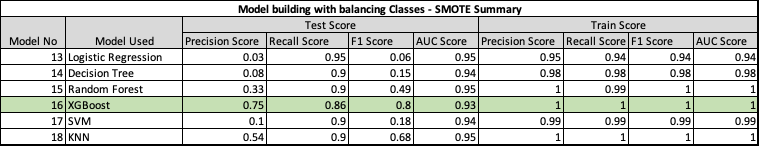

# D. Model building with balancing Classes - ADASYN

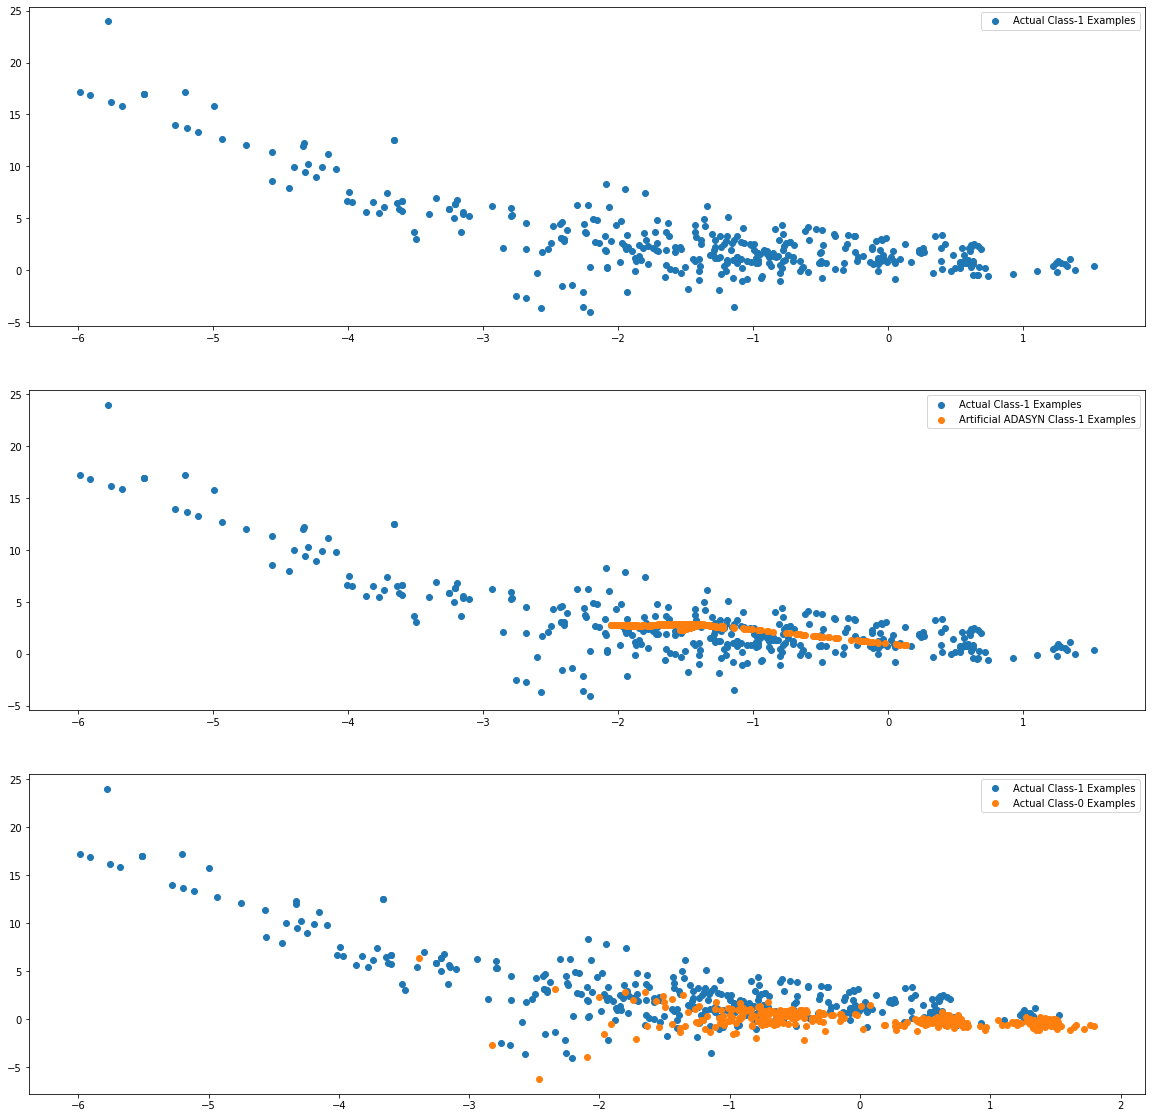

In [27]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## Model 19: Logistic Regresion

In [27]:
from sklearn.linear_model import LogisticRegression
# define models and parameters
lr6 = LogisticRegression()
solvers = ['newton-cg', 'sag', 'liblinear','saga']
penalty = ['l2']
c_values = [100,10, 1.0]
# define grid search
dict13 = dict(solver=solvers,penalty=penalty,C=c_values)
cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
p13 = tuneParamas(X_train_adasyn,y_train_adasyn,lr6,dict13,cv1)

Best: 0.963611 using {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
0.963609 (0.000454) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}
0.963610 (0.000453) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
0.963607 (0.000453) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
0.963576 (0.000455) with: {'solver': 'saga', 'penalty': 'l2', 'C': 1.0}
0.963578 (0.000455) with: {'solver': 'saga', 'penalty': 'l2', 'C': 100}
0.963609 (0.000453) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
0.963610 (0.000454) with: {'solver': 'sag', 'penalty': 'l2', 'C': 10}
0.963611 (0.000454) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
0.963607 (0.000454) with: {'solver': 'sag', 'penalty': 'l2', 'C': 1.0}
0.963578 (0.000454) with: {'solver': 'saga', 'penalty': 'l2', 'C': 10}


In [28]:
print(p13)

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}


In [29]:
lr7 = LogisticRegression(penalty='l2',solver = 'newton-cg',C = 10)
lr7.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=10, solver='newton-cg')

In [30]:
# predictions on Test data
y_pred_test_lr7 = lr7.predict(X_test)
getModelMetrics(y_test,y_pred_test_lr7)

F1 Score : 0.03
Recall_score : 0.96
Precision_score : 0.02
Roc_auc_score : 0.93


In [32]:
cut_off_prob=0.5
y_train_df = predictFraudWithProb(lr7,X_train_adasyn,y_train_adasyn,cut_off_prob)
y_train_df.head()

F1 Score : 0.89
Recall_score : 0.89
Precision_score : 0.90
Roc_auc_score : 0.89


,fraud,fraud_Prob,final_predicted
0,0,0.025904,0
1,0,0.107170,0
2,0,0.002429,0
3,0,0.123950,0
4,0,0.001335,0


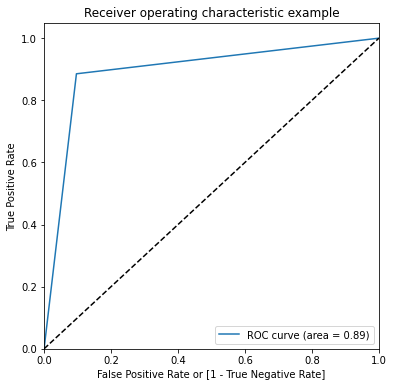

(array([0.        , 0.09665441, 1.        ]),
 array([0.        , 0.88533998, 1.        ]),
 array([2, 1, 0]))

In [33]:
draw_roc(y_train_df.fraud, y_train_df.final_predicted)

In [34]:
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.fraud, y_train_df.final_predicted)))

roc_auc_score : 0.89


     prob  accuracy     sensi     speci
0.0   0.0  0.499986  1.000000  0.000000
0.1   0.1  0.803904  0.993221  0.614598
0.2   0.2  0.864728  0.984296  0.745166
0.3   0.3  0.888079  0.952266  0.823897
0.4   0.4  0.893582  0.917069  0.870096
0.5   0.5  0.894343  0.885340  0.903346
0.6   0.6  0.885155  0.841033  0.929274
0.7   0.7  0.865534  0.780801  0.950263
0.8   0.8  0.832655  0.700252  0.965052
0.9   0.9  0.803525  0.625019  0.982021


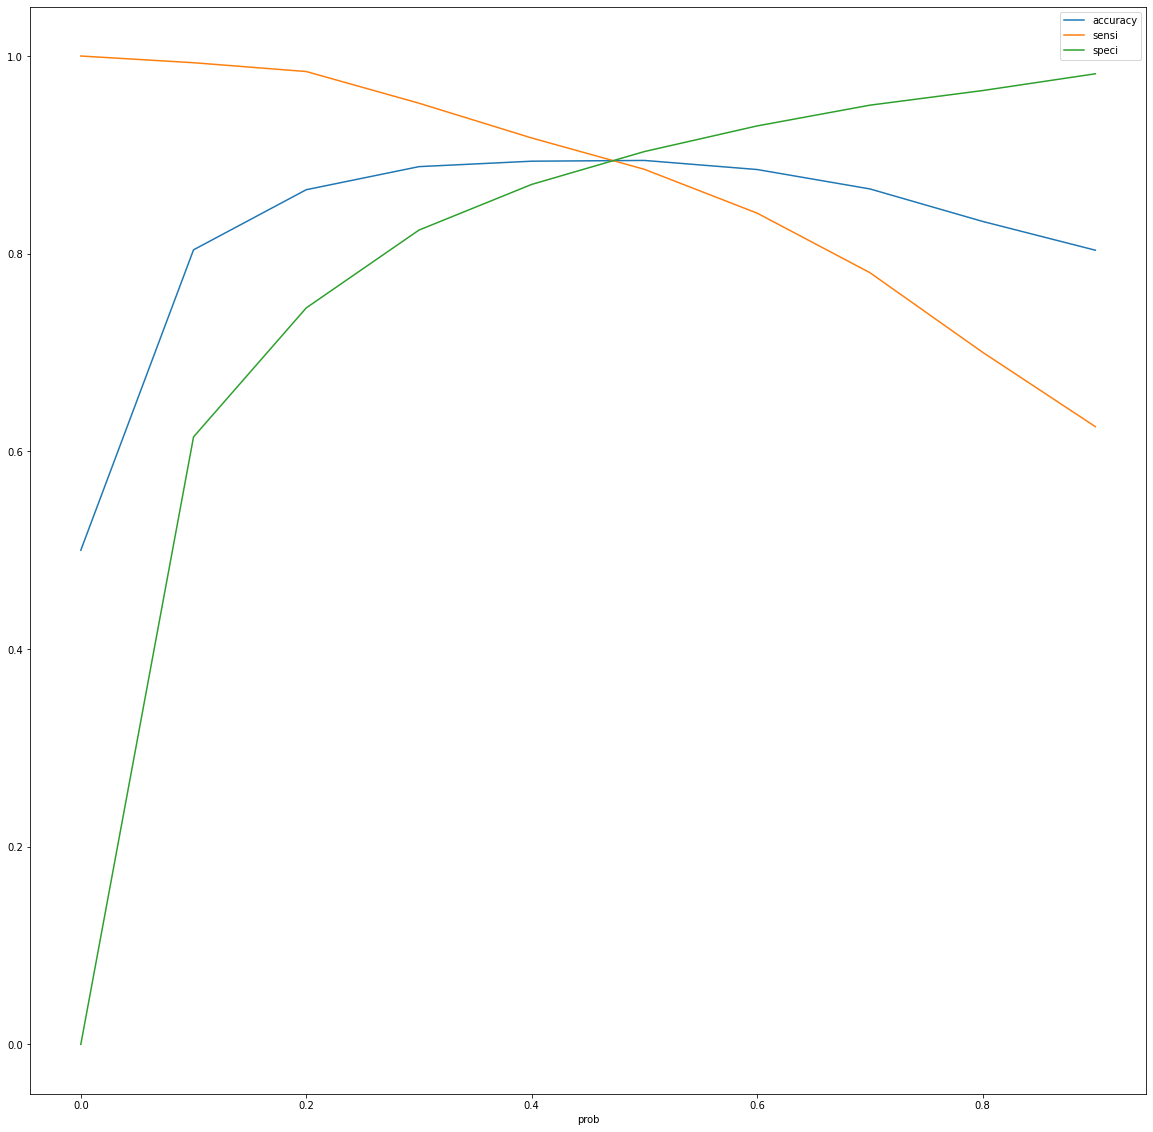

In [35]:
findOptimalCutoff(y_train_df)

In [38]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.5
tr4= predictFraudWithProb(lr7,X_train_adasyn,y_train_adasyn,cut_off_prob)

F1 Score : 0.89
Recall_score : 0.89
Precision_score : 0.90
Roc_auc_score : 0.89


In [39]:
# predicting with the choosen cut-off on test
tt4= predictFraudWithProb(lr7,X_test,y_test,cut_off_prob)

F1 Score : 0.03
Recall_score : 0.96
Precision_score : 0.02
Roc_auc_score : 0.93


## Model 20 Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt9 = DecisionTreeClassifier(max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
dt9.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=6, max_features='auto', min_samples_leaf=100,
                       min_samples_split=100, random_state=10)

In [41]:
y_pred_train_dt9 = dt9.predict(X_train_adasyn)

In [43]:
# for train dataset
getModelMetrics( y_train_adasyn,y_pred_train_dt9)

F1 Score : 0.87
Recall_score : 0.84
Precision_score : 0.90
Roc_auc_score : 0.88


In [44]:
# Predict testdataset
y_pred_test_dt9 = dt9.predict(X_test)
getModelMetrics( y_test,y_pred_test_dt9)

F1 Score : 0.03
Recall_score : 0.90
Precision_score : 0.02
Roc_auc_score : 0.90


In [45]:
# Create the parameter grid based on the results of random search 
l1 = range(5,15)
l2 = range(50, 400, 20)
l3 = range(50, 400, 20)
l4 = [8,10,12,14, 15, 16, 17, 18]
dict14 = dict(max_depth = l1, min_samples_leaf = l2, min_samples_split = l3, max_features= l4)

# Create a based model
dt10 = DecisionTreeClassifier(random_state=42)
cv2 = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
p14 = tuneParamas(X_train_adasyn,y_train_adasyn,dt10,dict14,cv2)

Best: 0.996163 using {'min_samples_split': 330, 'min_samples_leaf': 110, 'max_features': 15, 'max_depth': 13}
0.947592 (0.000323) with: {'min_samples_split': 290, 'min_samples_leaf': 230, 'max_features': 15, 'max_depth': 5}
0.994012 (0.000444) with: {'min_samples_split': 70, 'min_samples_leaf': 330, 'max_features': 17, 'max_depth': 11}
0.995298 (0.000404) with: {'min_samples_split': 230, 'min_samples_leaf': 170, 'max_features': 17, 'max_depth': 12}
0.952807 (0.001187) with: {'min_samples_split': 110, 'min_samples_leaf': 310, 'max_features': 14, 'max_depth': 5}
0.989511 (0.001422) with: {'min_samples_split': 330, 'min_samples_leaf': 50, 'max_features': 14, 'max_depth': 10}
0.996163 (0.000487) with: {'min_samples_split': 330, 'min_samples_leaf': 110, 'max_features': 15, 'max_depth': 13}
0.982365 (0.002218) with: {'min_samples_split': 130, 'min_samples_leaf': 170, 'max_features': 10, 'max_depth': 8}
0.989605 (0.004409) with: {'min_samples_split': 290, 'min_samples_leaf': 210, 'max_feature

In [46]:
print(p14)

{'min_samples_split': 330, 'min_samples_leaf': 110, 'max_features': 15, 'max_depth': 13}


In [47]:
dt11 = DecisionTreeClassifier(min_samples_split=330,min_samples_leaf=110,max_features=15,max_depth=13,random_state=10)
dt11.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=13, max_features=15, min_samples_leaf=110,
                       min_samples_split=330, random_state=10)

In [48]:
# predictions on Test data
y_pred_test_dt11 = dt11.predict(X_test)
getModelMetrics(y_test,y_pred_test_dt11)

F1 Score : 0.07
Recall_score : 0.88
Precision_score : 0.03
Roc_auc_score : 0.92


In [49]:
# predictions on Train data
y_pred_train_dt11 = dt11.predict(X_train_adasyn)
getModelMetrics(y_train_adasyn,y_pred_train_dt11)

F1 Score : 0.98
Recall_score : 0.99
Precision_score : 0.96
Roc_auc_score : 0.98


## Model 21 Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf9 = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)
rf9.fit(X_train_adasyn,y_train_adasyn)

RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=100,
                       min_samples_split=50, n_estimators=80, random_state=10)

In [29]:
# predictions on Test data
y_pred_test_rf9 = rf9.predict(X_test)
getModelMetrics(y_test,y_pred_test_rf9)

F1 Score : 0.48
Recall_score : 0.90
Precision_score : 0.33
Roc_auc_score : 0.95


In [30]:
# predictions on Train data
y_pred_train_rf9 = rf9.predict(X_train_adasyn)
getModelMetrics(y_train_adasyn,y_pred_train_rf9)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


In [31]:
dict15 = {'max_depth': range(10, 30, 10),
             'n_estimators': range(50, 150, 25),
             'max_features': [4, 8, 14, 20, 24],
             'min_samples_leaf': range(100, 400, 50),
             'min_samples_split': range(50, 300, 50),
             }
rf10 = RandomForestClassifier(random_state=10)
cv3 = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)
p15 = tuneParamas(X_train_adasyn,y_train_adasyn,rf10,dict15,cv3)

Best: 0.999780 using {'n_estimators': 50, 'min_samples_split': 150, 'min_samples_leaf': 100, 'max_features': 8, 'max_depth': 20}
0.997917 (0.000072) with: {'n_estimators': 125, 'min_samples_split': 200, 'min_samples_leaf': 200, 'max_features': 20, 'max_depth': 10}
0.998940 (0.000045) with: {'n_estimators': 125, 'min_samples_split': 100, 'min_samples_leaf': 300, 'max_features': 8, 'max_depth': 20}
0.997530 (0.000101) with: {'n_estimators': 100, 'min_samples_split': 200, 'min_samples_leaf': 250, 'max_features': 20, 'max_depth': 10}
0.999780 (0.000021) with: {'n_estimators': 50, 'min_samples_split': 150, 'min_samples_leaf': 100, 'max_features': 8, 'max_depth': 20}
0.999735 (0.000017) with: {'n_estimators': 50, 'min_samples_split': 200, 'min_samples_leaf': 100, 'max_features': 14, 'max_depth': 20}
0.995997 (0.000101) with: {'n_estimators': 100, 'min_samples_split': 200, 'min_samples_leaf': 300, 'max_features': 24, 'max_depth': 10}
0.999554 (0.000020) with: {'n_estimators': 100, 'min_sample

In [32]:
print(p15)

{'n_estimators': 50, 'min_samples_split': 150, 'min_samples_leaf': 100, 'max_features': 8, 'max_depth': 20}


In [33]:
rf11 = RandomForestClassifier(n_estimators=50, min_samples_split=150 ,min_samples_leaf=100 
                             ,max_features= 8,max_depth=20,random_state=10)
rf11.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=20, max_features=8, min_samples_leaf=100,
                       min_samples_split=150, n_estimators=50, random_state=10)

In [34]:
# predictions on Test data
y_pred_test_rf11 = rf11.predict(X_test)
getModelMetrics(y_test,y_pred_test_rf11)

F1 Score : 0.44
Recall_score : 0.90
Precision_score : 0.29
Roc_auc_score : 0.95


In [35]:
# predictions on Train data
y_pred_train_rf11 = rf11.predict(X_train_adasyn)
getModelMetrics(y_train_adasyn,y_pred_train_rf11)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


## Model 22: XGBoost

In [36]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [37]:
xgb9  = XGBClassifier(random_state=42)
xgb9.fit(X_train_adasyn,y_train_adasyn)

[19:53:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
# predictions on Test data
y_pred_test_xgb9 = xgb9.predict(X_test)
getModelMetrics(y_test,y_pred_test_xgb9)

F1 Score : 0.79
Recall_score : 0.87
Precision_score : 0.73
Roc_auc_score : 0.93


In [39]:
# predictions on Train data
y_pred_train_xgb9 = xgb9.predict(X_train_adasyn)
getModelMetrics(y_train_adasyn,y_pred_train_xgb9)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


In [40]:
dict16 = {'max_depth':range(3,10,2),
               'min_child_weight':range(1,6,2),
               'n_estimators': range(50,200,20),
               'gamma': [i/10.0 for i in range(0,5)],
               'learning_rate':[0.1,0.2,0.3,0.4],
              }
xgb10 = XGBClassifier(n_jobs= -1,random_state=42)
cv4 = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)
p16 = tuneParamas(X_train_adasyn,y_train_adasyn,xgb10,dict16,cv4)

[21:12:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.999985 using {'n_estimators': 150, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.4, 'gamma': 0.2}
0.999985 (0.000010) with: {'n_estimators': 150, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.4, 'gamma': 0.2}
0.988746 (0.000169) with: {'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.0}
0.999263 (0.000097) with: {'n_estimators': 70, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.4}
0.999975 (0.000016) with: {'n_estimators': 170, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.3, 'gamma': 0.4}
0.999965 (0.000015) with: {'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.0}
0.999955 (0.00001

In [41]:
print(p16)

{'n_estimators': 150, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.4, 'gamma': 0.2}


In [42]:
xgb11 = XGBClassifier(learning_rate =0.4,max_depth = 5,min_child_weight=5,n_estimators=150,
                     gamma= 0.2 ,n_jobs= -1,random_state=42)
xgb11.fit(X_train_adasyn, y_train_adasyn)

[21:17:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
# predictions on Test data
y_pred_test_xgb11 = xgb11.predict(X_test)
getModelMetrics(y_test,y_pred_test_xgb11)

F1 Score : 0.79
Recall_score : 0.88
Precision_score : 0.71
Roc_auc_score : 0.94


In [44]:
# predictions on Train data
y_pred_train_xgb11 = xgb11.predict(X_train_adasyn)
getModelMetrics(y_train_adasyn,y_pred_train_xgb11)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


## Model 23:  SVM

In [26]:
from sklearn.svm import SVC

In [27]:
# instantiate an object of class SVC()
# note that we are using cost C=1
svm3 = SVC(C = 1)
svm3.fit(X_train_adasyn, y_train_adasyn)

SVC(C=1)

In [28]:
# predictions on Test data
y_pred_test_svm3 = svm3.predict(X_test)
getModelMetrics(y_test,y_pred_test_svm3)

F1 Score : 0.16
Recall_score : 0.80
Precision_score : 0.09
Roc_auc_score : 0.89


In [29]:
# predictions on Train data
y_pred_train_svm3 = svm3.predict(X_train_adasyn)
getModelMetrics(y_train_adasyn,y_pred_train_svm3)

F1 Score : 0.99
Recall_score : 1.00
Precision_score : 0.99
Roc_auc_score : 0.99


## Model 24: KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_adasyn,y_train_adasyn)

KNeighborsClassifier(n_neighbors=3)

In [32]:
# predictions on Test data
y_pred_test_knn3 = knn3.predict(X_test)
getModelMetrics(y_test,y_pred_test_knn3)

F1 Score : 0.68
Recall_score : 0.90
Precision_score : 0.54
Roc_auc_score : 0.95


In [33]:
# predictions on Train data
y_pred_train_knn3 = knn3.predict(X_train_adasyn)
getModelMetrics(y_train_adasyn,y_pred_train_knn3)

F1 Score : 1.00
Recall_score : 1.00
Precision_score : 1.00
Roc_auc_score : 1.00


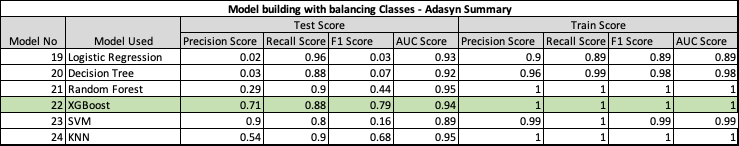

# Final Summary

### Adasyn oversampling method shows the best result on XGBoost Model

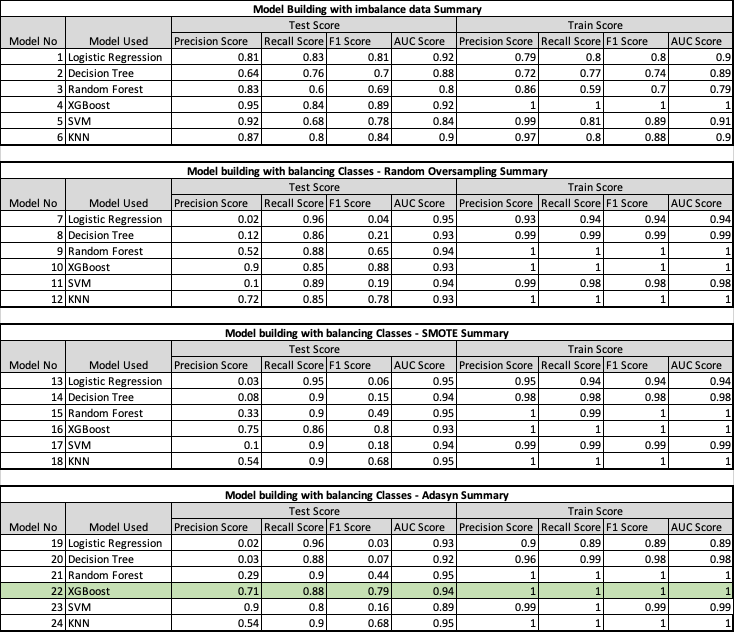

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [31]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(learning_rate =0.4,max_depth = 5,min_child_weight=5,n_estimators=150,
                     gamma= 0.2 ,n_jobs= -1,random_state=42) #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn, y_train_adasyn) # fit on the balanced dataset
y_pred_final = clf.predict(X_test)
print(getModelMetrics(y_test,y_pred_final))  #print the evaluation score on the X_test by choosing the best evaluation metric

[08:47:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score : 0.79
Recall_score : 0.88
Precision_score : 0.71
Roc_auc_score : 0.94
None


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


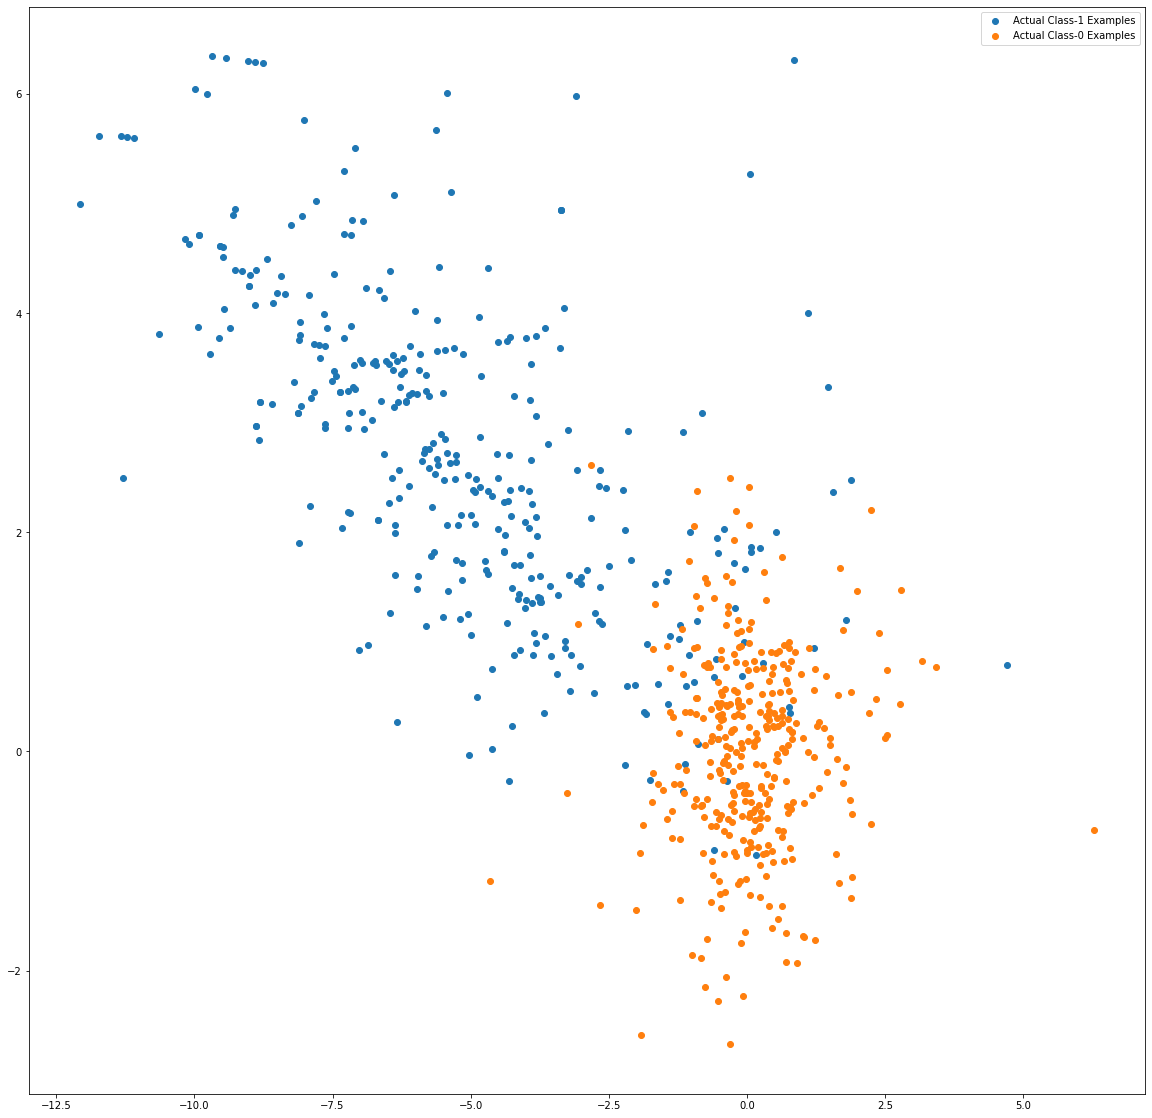

In [32]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [35]:
y_train_pred_final = clf.predict(X_train_adasyn)
print('Train auc =', metrics.roc_auc_score(y_train_adasyn,y_train_pred_final))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn,y_train_pred_final)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
1
